# Evaluation of all models

**Comparison of all models**:

**ML:**
- Logistic Regression
- Random Forest
- Support Vector Machine
- Deep Neural Network (Multilayer Perceptron)
- Naive Bayes
- K-Nearest Neighbors

**LLMs:**
- GPT (OpenAI)
- Gemini
- Gemma
- Claude
- DeepSeek
- Grok

## 0 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import holoviews as hv
import plotly.graph_objects as go
from holoviews import opts
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, recall_score, matthews_corrcoef, accuracy_score, auc, roc_curve
from sklearn.model_selection import train_test_split

In [2]:
data_change = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change.csv", sep = ",", low_memory = False)

In [3]:
# read "dat/dips/indices_k1_not_space.txt" file
with open("../dat/dips/indices_k1_not_space.txt", "r") as f:
    indices = [int(line.strip()) for line in f.readlines()]

In [4]:
y_pred_lr = pd.read_csv("01_ML/y_pred_ML/y_pred_lr.csv", sep =",")
y_pred_rf = pd.read_csv("01_ML/y_pred_ML/y_pred_rf.csv", sep =",")
y_pred_svc = pd.read_csv("01_ML/y_pred_ML/y_pred_svc.csv", sep =",")
y_pred_dnn = pd.read_csv("01_ML/y_pred_ML/y_pred_dnn.csv", sep =",")
y_pred_knn = pd.read_csv("01_ML/y_pred_ML/y_pred_knn.csv", sep =",")
y_pred_nb = pd.read_csv("01_ML/y_pred_ML/y_pred_nb.csv", sep =",")
y_pred_xgb = pd.read_csv("01_ML/y_pred_ML/y_pred_xgb.csv", sep =",")

In [5]:
y_pred_GPT_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_simple_prompt.csv", sep =",")
y_pred_GPT_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_class_definitions_prompt.csv", sep =",")
y_pred_GPT_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_profiled_simple_prompt.csv", sep =",")
y_pred_GPT_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_few_shot_prompt.csv", sep =",")
y_pred_GPT_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_vignette_prompt.csv", sep =",")
y_pred_GPT_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_cot_prompt.csv", sep =",")

In [6]:
y_pred_GPT_o3_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_simple_prompt.csv", sep =",")
y_pred_GPT_o3_class_definitions_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_class_definitions_prompt.csv", sep =",")
y_pred_GPT_o3_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_profiled_simple_prompt.csv", sep =",")
y_pred_GPT_o3_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_few_shot_prompt.csv", sep =",")
y_pred_GPT_o3_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_vignette_prompt.csv", sep =",")
y_pred_GPT_o3_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_cot_prompt.csv", sep =",")

In [7]:
y_pred_Gemini_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_simple_prompt.csv", sep =",")
y_pred_Gemini_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_class_definitions_prompt.csv", sep =",")
y_pred_Gemini_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_profiled_simple_prompt.csv", sep =",")
y_pred_Gemini_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt.csv", sep =",")
y_pred_Gemini_few_shot_prompt_10 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_10.csv", sep =",")
y_pred_Gemini_few_shot_prompt_20 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_20.csv", sep =",")
y_pred_Gemini_few_shot_prompt_50 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_50.csv", sep =",")
y_pred_Gemini_few_shot_prompt_100 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_100.csv", sep =",")
y_pred_Gemini_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_vignette_prompt.csv", sep =",")
y_pred_Gemini_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_cot_prompt.csv", sep =",")

In [8]:
y_pred_Gemma_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_simple_prompt.csv", sep =",")
y_pred_Gemma_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_class_definitions_prompt.csv", sep =",")
y_pred_Gemma_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_profiled_simple_prompt.csv", sep =",")
y_pred_Gemma_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_few_shot_prompt.csv", sep =",")
y_pred_Gemma_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_vignette_prompt.csv", sep =",")
y_pred_Gemma_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_cot_prompt.csv", sep =",")

In [9]:
y_pred_Claude_4_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_simple_prompt.csv", sep =",")
y_pred_Claude_4_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_class_definitions_prompt.csv", sep =",")
y_pred_Claude_4_profiled_simple_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/Claude/y_pred_claude_profiled_simple_prompt.csv", sep =",")
y_pred_Claude_4_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_few_shot_prompt.csv", sep =",")
y_pred_Claude_4_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_vignette_prompt.csv", sep =",")
y_pred_Claude_4_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_cot_prompt.csv", sep =",")

In [10]:
y_pred_DeepSeek_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_simple_prompt.csv", sep =",")
y_pred_DeepSeek_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_class_definitions_prompt.csv", sep =",")
y_pred_DeepSeek_profiled_simple_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_profiled_simple_prompt.csv", sep =",")
y_pred_DeepSeek_few_shot_prompt_20 = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt_20.csv", sep =",")
y_pred_DeepSeek_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt.csv", sep =",")
y_pred_DeepSeek_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_vignette_prompt.csv", sep =",")
y_pred_DeepSeek_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_cot_prompt.csv", sep =",")

In [11]:
y_pred_Grok_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_simple_prompt.csv", sep =",")
y_pred_Grok_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_class_definitions_prompt.csv", sep =",")
y_pred_Grok_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_profiled_simple_prompt.csv", sep =",")
y_pred_Grok_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt.csv", sep =",")
y_pred_Grok_few_shot_prompt_20 = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt_20.csv", sep =",")
y_pred_Grok_few_shot_prompt_100 = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt_100.csv", sep =",")
y_pred_Grok_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_vignette_prompt.csv", sep =",")
y_pred_Grok_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_cot_prompt.csv", sep =",")

### Unification Approaches

In [12]:
y_pred_pov_all_models = pd.read_csv("04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_all_models.csv", sep =",")
y_pred_pov_ml_votes = pd.read_csv("04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_ml_models.csv", sep =",")
y_pred_pov_llm_votes = pd.read_csv("04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_llm_models.csv", sep =",")
y_pred_pov_simple_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_simple_models.csv", sep =",")
y_pred_pov_class_definitions_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_class_definitions_models.csv", sep =",")
y_pred_pov_profiled_simple_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_profiled_simple_models.csv", sep =",")
y_pred_pov_few_shot_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_few_shot_models.csv", sep =",")
y_pred_pov_vignette_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_vignette_models.csv", sep =",")
y_pred_pov_cot_votes = pd.read_csv("04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_cot_models.csv", sep =",")

In [13]:
y_pred_best_LLM_or_best_ML = pd.read_csv(
    "04_Unification/y_pred_unification/OR_unification/y_pred_best_LLM_or_best_ML.csv", sep = ",")
y_pred_OR_best_LLMs = pd.read_csv(
    "04_Unification/y_pred_unification/OR_unification/y_pred_OR_best_LLMs.csv", sep = ",")

In [14]:
y_pred_new_input_dnn = pd.read_csv("04_Unification/y_pred_unification/new_input/y_pred_new_input_dnn_X_train.csv", sep = ",")
y_pred_new_input_svc = pd.read_csv("04_Unification/y_pred_unification/new_input/y_pred_new_input_svc_X_train.csv", sep =",")
y_pred_new_input_nb = pd.read_csv("04_Unification/y_pred_unification/new_input/y_pred_new_input_nb_X_train.csv", sep =",")
# y_pred_new_input_svc_2 = pd.read_csv("04_Unification/y_pred_unification/new_input/y_pred_new_input_svc_all.csv", sep =",")


# 1 Metrics

In [15]:
# Predictors
X = data_change
X = X.drop(["hpi"], axis = 1)

# Target
y = data_change["hpi"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print("X_train shape: ", X_train.shape, round(X_train.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test.shape, round(X_test.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train.shape, round(y_train.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0]/len(y), 2), "\n")

X_train shape:  (983, 22) 0.8 
 X_test shape:  (246, 22) 0.2 
 y_train shape:  (983,) 0.8 
 y_test shape:  (246,) 0.2 



In [122]:
X_train.head()

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,bmi_kat,ses_kom,whi_change,soz_change,gke_change,lzh_change,asi_change,bsq_change,das_change,scl_change
929,-0.027917,0.188758,-0.768319,-4.988109,0.041981,-0.113246,-0.035276,0.027304,-1.051033,0.108352,...,0,0,-0.235399,0.315223,0.094477,7.163587,-0.309628,0.515921,0.972139,0.368574
805,-0.994398,-1.324730,-0.088340,0.013646,-0.357975,-0.201112,1.099218,-0.897479,-0.668917,-0.475156,...,0,0,0.281218,1.423362,-0.181980,0.316709,-0.171604,0.418571,0.918002,-2.550673
854,-0.994398,0.722930,1.498278,0.660932,-1.157886,0.589681,-1.818051,-0.897479,-0.859975,-1.933925,...,0,1,0.281218,-0.349661,-0.458436,0.492680,0.242469,-0.068179,1.188689,0.457036
1045,-0.511158,-0.790558,-0.768319,0.660932,0.441936,-0.991905,2.071641,-0.104808,-0.000212,0.316748,...,0,0,-0.235399,0.204409,-0.458436,-0.563147,0.242469,0.126521,0.376627,-0.094610
36,-0.027917,0.990016,1.724938,-0.795462,-1.157886,0.853278,-0.359417,-0.236920,0.095317,-1.016984,...,0,-1,-0.235399,-0.128033,-1.011349,1.900449,-0.585676,-1.041680,-0.327159,0.722422


## Removing wrong indices from y_test and y_pred

In [16]:
# # get indices from y_test if they are not in indices
# y_test_indices = y_test.index.tolist()
# print(len(y_test_indices))
# y_test_indices = [i for i in y_test_indices if i not in indices]
# print(len(y_test_indices))

In [17]:
# y_train_indices = y_train.index.tolist()
# print(len(y_train_indices))
# y_train_indices = [i for i in y_train_indices if i not in indices]
# print(len(y_train_indices))

In [18]:
# print(len(y_test_indices) / (len(y_train_indices) + len(y_test_indices)))
# print(len(y_train_indices) / (len(y_train_indices) + len(y_test_indices)))

In [19]:
# # add a column "index" to y_test going from 0 to len(y_test) - 1
# # y_test["index"] = range(len(y_test))
# # y_test
# y_test_excl = pd.DataFrame({
#     "hpi": y_test,
#     "index": range(len(y_test))
# })
# y_test_excl = y_test_excl[y_test_excl.index.isin(y_test_indices)]
#
# # get all values from y_test_excl["index"] and convert them to a list
# y_test_excl_indices = y_test_excl["index"].tolist()
#
# y_test_excl

In [20]:
# y_test_excl_indices

In [21]:
# y_test_excl = y_test_excl["hpi"]

In [22]:
# # for all y_pred_GPT_o3 only keep rows with index that are in y_test_excl_indices
# y_pred_GPT_o3_simple_prompt = y_pred_GPT_o3_simple_prompt[y_pred_GPT_o3_simple_prompt.index.isin(y_test_excl_indices)]
# y_pred_GPT_o3_class_definitions_prompt = y_pred_GPT_o3_class_definitions_prompt[y_pred_GPT_o3_class_definitions_prompt.index.isin(y_test_excl_indices)]
# y_pred_GPT_o3_profiled_simple_prompt = y_pred_GPT_o3_profiled_simple_prompt[y_pred_GPT_o3_profiled_simple_prompt.index.isin(y_test_excl_indices)]
# y_pred_GPT_o3_few_shot_prompt = y_pred_GPT_o3_few_shot_prompt[y_pred_GPT_o3_few_shot_prompt.index.isin(y_test_excl_indices)]
# y_pred_GPT_o3_vignette_prompt = y_pred_GPT_o3_vignette_prompt[y_pred_GPT_o3_vignette_prompt.index.isin(y_test_excl_indices)]
# y_pred_GPT_o3_cot_prompt = y_pred_GPT_o3_cot_prompt[y_pred_GPT_o3_cot_prompt.index.isin(y_test_excl_indices)]

In [23]:
# # for all other y_pred_* only keep rows with index that are in y_test_excl_indices
# y_pred_GPT_simple_prompt = y_pred_GPT_simple_prompt[y_pred_GPT_simple_prompt.index.isin(y_test_excl_indices)]
# y_pred_GPT_class_def_prompt = y_pred_GPT_class_def_prompt[y_pred_GPT_class_def_prompt.index.isin(y_test_excl_indices)]
# y_pred_GPT_profiled_simple_prompt = y_pred_GPT_profiled_simple_prompt[y_pred_GPT_profiled_simple_prompt.index.isin(y_test_excl_indices)]
# y_pred_GPT_few_shot_prompt = y_pred_GPT_few_shot_prompt[y_pred_GPT_few_shot_prompt.index.isin(y_test_excl_indices)]
# y_pred_GPT_vignette_prompt = y_pred_GPT_vignette_prompt[y_pred_GPT_vignette_prompt.index.isin(y_test_excl_indices)]
# y_pred_GPT_cot_prompt = y_pred_GPT_cot_prompt[y_pred_GPT_cot_prompt.index.isin(y_test_excl_indices)]
#
# y_pred_Gemini_simple_prompt = y_pred_Gemini_simple_prompt[y_pred_Gemini_simple_prompt.index.isin(y_test_excl_indices)]
# y_pred_Gemini_class_def_prompt = y_pred_Gemini_class_def_prompt[y_pred_Gemini_class_def_prompt.index.isin(y_test_excl_indices)]
# y_pred_Gemini_profiled_simple_prompt = y_pred_Gemini_profiled_simple_prompt[y_pred_Gemini_profiled_simple_prompt.index.isin(y_test_excl_indices)]
# y_pred_Gemini_few_shot_prompt = y_pred_Gemini_few_shot_prompt[y_pred_Gemini_few_shot_prompt.index.isin(y_test_excl_indices)]
# y_pred_Gemini_few_shot_prompt_10 = y_pred_Gemini_few_shot_prompt_10[y_pred_Gemini_few_shot_prompt_10.index.isin(y_test_excl_indices)]
# y_pred_Gemini_few_shot_prompt_20 = y_pred_Gemini_few_shot_prompt_20[y_pred_Gemini_few_shot_prompt_20.index.isin(y_test_excl_indices)]
# y_pred_Gemini_few_shot_prompt_50 = y_pred_Gemini_few_shot_prompt_50[y_pred_Gemini_few_shot_prompt_50.index.isin(y_test_excl_indices)]
# y_pred_Gemini_few_shot_prompt_100 = y_pred_Gemini_few_shot_prompt_100[y_pred_Gemini_few_shot_prompt_100.index.isin(y_test_excl_indices)]
# y_pred_Gemini_vignette_prompt = y_pred_Gemini_vignette_prompt[y_pred_Gemini_vignette_prompt.index.isin(y_test_excl_indices)]
# y_pred_Gemini_cot_prompt = y_pred_Gemini_cot_prompt[y_pred_Gemini_cot_prompt.index.isin(y_test_excl_indices)]
#
# y_pred_Gemma_simple_prompt = y_pred_Gemma_simple_prompt[y_pred_Gemma_simple_prompt.index.isin(y_test_excl_indices)]
# y_pred_Gemma_class_def_prompt = y_pred_Gemma_class_def_prompt[y_pred_Gemma_class_def_prompt.index.isin(y_test_excl_indices)]
# y_pred_Gemma_profiled_simple_prompt = y_pred_Gemma_profiled_simple_prompt[y_pred_Gemma_profiled_simple_prompt.index.isin(y_test_excl_indices)]
# y_pred_Gemma_few_shot_prompt = y_pred_Gemma_few_shot_prompt[y_pred_Gemma_few_shot_prompt.index.isin(y_test_excl_indices)]
# y_pred_Gemma_vignette_prompt = y_pred_Gemma_vignette_prompt[y_pred_Gemma_vignette_prompt.index.isin(y_test_excl_indices)]
# y_pred_Gemma_cot_prompt = y_pred_Gemma_cot_prompt[y_pred_Gemma_cot_prompt.index.isin(y_test_excl_indices)]
#
# y_pred_Claude_4_simple_prompt = y_pred_Claude_4_simple_prompt[y_pred_Claude_4_simple_prompt.index.isin(y_test_excl_indices)]
# y_pred_Claude_4_class_def_prompt = y_pred_Claude_4_class_def_prompt[y_pred_Claude_4_class_def_prompt.index.isin(y_test_excl_indices)]
# y_pred_Claude_4_profiled_simple_prompt = y_pred_Claude_4_profiled_simple_prompt[y_pred_Claude_4_profiled_simple_prompt.index.isin(y_test_excl_indices)]
# y_pred_Claude_4_few_shot_prompt = y_pred_Claude_4_few_shot_prompt[y_pred_Claude_4_few_shot_prompt.index.isin(y_test_excl_indices)]
# y_pred_Claude_4_vignette_prompt = y_pred_Claude_4_vignette_prompt[y_pred_Claude_4_vignette_prompt.index.isin(y_test_excl_indices)]
# y_pred_Claude_4_cot_prompt = y_pred_Claude_4_cot_prompt[y_pred_Claude_4_cot_prompt.index.isin(y_test_excl_indices)]
#
# y_pred_DeepSeek_simple_prompt = y_pred_DeepSeek_simple_prompt[y_pred_DeepSeek_simple_prompt.index.isin(y_test_excl_indices)]
# y_pred_DeepSeek_class_def_prompt = y_pred_DeepSeek_class_def_prompt[y_pred_DeepSeek_class_def_prompt.index.isin(y_test_excl_indices)]
# y_pred_DeepSeek_profiled_simple_prompt = y_pred_DeepSeek_profiled_simple_prompt[y_pred_DeepSeek_profiled_simple_prompt.index.isin(y_test_excl_indices)]
# y_pred_DeepSeek_few_shot_prompt_20 = y_pred_DeepSeek_few_shot_prompt_20[y_pred_DeepSeek_few_shot_prompt_20.index.isin(y_test_excl_indices)]
# y_pred_DeepSeek_few_shot_prompt = y_pred_DeepSeek_few_shot_prompt[y_pred_DeepSeek_few_shot_prompt.index.isin(y_test_excl_indices)]
# y_pred_DeepSeek_vignette_prompt = y_pred_DeepSeek_vignette_prompt[y_pred_DeepSeek_vignette_prompt.index.isin(y_test_excl_indices)]
# y_pred_DeepSeek_cot_prompt = y_pred_DeepSeek_cot_prompt[y_pred_DeepSeek_cot_prompt.index.isin(y_test_excl_indices)]
#
# y_pred_Grok_simple_prompt = y_pred_Grok_simple_prompt[y_pred_Grok_simple_prompt.index.isin(y_test_excl_indices)]
# y_pred_Grok_class_def_prompt = y_pred_Grok_class_def_prompt[y_pred_Grok_class_def_prompt.index.isin(y_test_excl_indices)]
# y_pred_Grok_profiled_simple_prompt = y_pred_Grok_profiled_simple_prompt[y_pred_Grok_profiled_simple_prompt.index.isin(y_test_excl_indices)]
# y_pred_Grok_few_shot_prompt = y_pred_Grok_few_shot_prompt[y_pred_Grok_few_shot_prompt.index.isin(y_test_excl_indices)]
# y_pred_Grok_few_shot_prompt_20 = y_pred_Grok_few_shot_prompt_20[y_pred_Grok_few_shot_prompt_20.index.isin(y_test_excl_indices)]
# y_pred_Grok_few_shot_prompt_100 = y_pred_Grok_few_shot_prompt_100[y_pred_Grok_few_shot_prompt_100.index.isin(y_test_excl_indices)]
# y_pred_Grok_vignette_prompt = y_pred_Grok_vignette_prompt[y_pred_Grok_vignette_prompt.index.isin(y_test_excl_indices)]
# y_pred_Grok_cot_prompt = y_pred_Grok_cot_prompt[y_pred_Grok_cot_prompt.index.isin(y_test_excl_indices)]

In [24]:
# calculate metrics for all models
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = recall_score(y_test, y_pred, average = "macro")
    micro_f1 = recall_score(y_test, y_pred, average = "micro")
    mcc = matthews_corrcoef(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel().tolist()

    # cm = confusion_matrix(y_test, y_pred)
    # precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    # recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    #
    # sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    # specificity = cm[0,0]/(cm[0,0]+cm[0,1])

    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)


    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
    roc_auc = auc(fpr, tpr)

    # dictionary with all metrics
    metrics = {
        "accuracy": accuracy,
        "macro_f1": macro_f1,
        "micro_f1": micro_f1,
        "mcc": mcc,
        "precision": precision,
        "recall": recall,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "roc_auc": roc_auc
    }

    return metrics

In [25]:
# calculate metrics for all models
metrics_lr = calculate_metrics(y_test, y_pred_lr)
metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_svc = calculate_metrics(y_test, y_pred_svc)
metrics_dnn = calculate_metrics(y_test, y_pred_dnn)
metrics_knn = calculate_metrics(y_test, y_pred_knn)
metrics_nb = calculate_metrics(y_test, y_pred_nb)
metrics_xgb = calculate_metrics(y_test, y_pred_xgb)

In [26]:
metrics_GPT_simple_prompt = calculate_metrics(y_test, y_pred_GPT_simple_prompt)
metrics_GPT_class_def_prompt = calculate_metrics(y_test, y_pred_GPT_class_def_prompt)
metrics_GPT_profiled_simple_prompt = calculate_metrics(y_test, y_pred_GPT_profiled_simple_prompt)
metrics_GPT_few_shot_prompt = calculate_metrics(y_test, y_pred_GPT_few_shot_prompt)
metrics_GPT_vignette_prompt = calculate_metrics(y_test, y_pred_GPT_vignette_prompt)
metrics_GPT_cot_prompt = calculate_metrics(y_test, y_pred_GPT_cot_prompt["y_pred"])

In [27]:
# metrics_GPT_simple_prompt = calculate_metrics(y_test_excl, y_pred_GPT_simple_prompt)
# metrics_GPT_class_def_prompt = calculate_metrics(y_test_excl, y_pred_GPT_class_def_prompt)
# metrics_GPT_profiled_simple_prompt = calculate_metrics(y_test_excl, y_pred_GPT_profiled_simple_prompt)
# metrics_GPT_few_shot_prompt = calculate_metrics(y_test_excl, y_pred_GPT_few_shot_prompt)
# metrics_GPT_vignette_prompt = calculate_metrics(y_test_excl, y_pred_GPT_vignette_prompt)
# metrics_GPT_cot_prompt = calculate_metrics(y_test_excl, y_pred_GPT_cot_prompt["y_pred"])

In [28]:
metrics_GPT_o3_simple_prompt = calculate_metrics(y_test, y_pred_GPT_o3_simple_prompt["y_pred"])
metrics_GPT_o3_class_definitions_prompt = calculate_metrics(y_test, y_pred_GPT_o3_class_definitions_prompt["y_pred"])
metrics_GPT_o3_profiled_simple_prompt = calculate_metrics(y_test, y_pred_GPT_o3_profiled_simple_prompt["y_pred"])
metrics_GPT_o3_vignette_prompt = calculate_metrics(y_test, y_pred_GPT_o3_vignette_prompt["y_pred"])
metrics_GPT_o3_few_shot_prompt = calculate_metrics(y_test, y_pred_GPT_o3_few_shot_prompt["y_pred"])
metrics_GPT_o3_cot_prompt = calculate_metrics(y_test, y_pred_GPT_o3_cot_prompt["y_pred"])

In [29]:
# metrics_GPT_o3_simple_prompt = calculate_metrics(y_test_excl, y_pred_GPT_o3_simple_prompt["y_pred"])
# metrics_GPT_o3_class_definitions_prompt = calculate_metrics(y_test_excl, y_pred_GPT_o3_class_definitions_prompt["y_pred"])
# metrics_GPT_o3_profiled_simple_prompt = calculate_metrics(y_test_excl, y_pred_GPT_o3_profiled_simple_prompt["y_pred"])
# metrics_GPT_o3_vignette_prompt = calculate_metrics(y_test_excl, y_pred_GPT_o3_vignette_prompt["y_pred"])
# metrics_GPT_o3_few_shot_prompt = calculate_metrics(y_test_excl, y_pred_GPT_o3_few_shot_prompt["y_pred"])
# metrics_GPT_o3_cot_prompt = calculate_metrics(y_test_excl, y_pred_GPT_o3_cot_prompt["y_pred"])

In [30]:
metrics_Gemini_simple_prompt = calculate_metrics(y_test, y_pred_Gemini_simple_prompt["y_pred"])
metrics_Gemini_class_def_prompt = calculate_metrics(y_test, y_pred_Gemini_class_def_prompt["y_pred"])
metrics_Gemini_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Gemini_profiled_simple_prompt["y_pred"])
metrics_Gemini_few_shot_prompt = calculate_metrics(y_test, y_pred_Gemini_few_shot_prompt["y_pred"])
metrics_Gemini_few_shot_prompt_10 = calculate_metrics(y_test, y_pred_Gemini_few_shot_prompt_10["y_pred"])
metrics_Gemini_few_shot_prompt_20 = calculate_metrics(y_test, y_pred_Gemini_few_shot_prompt_20["y_pred"])
metrics_Gemini_few_shot_prompt_50 = calculate_metrics(y_test, y_pred_Gemini_few_shot_prompt_50["y_pred"])
metrics_Gemini_few_shot_prompt_100 = calculate_metrics(y_test, y_pred_Gemini_few_shot_prompt_100["y_pred"])
metrics_Gemini_vignette_prompt = calculate_metrics(y_test, y_pred_Gemini_vignette_prompt["y_pred"])
metrics_Gemini_cot_prompt = calculate_metrics(y_test, y_pred_Gemini_cot_prompt["y_pred"])

In [31]:
# metrics_Gemini_simple_prompt = calculate_metrics(y_test_excl, y_pred_Gemini_simple_prompt["y_pred"])
# metrics_Gemini_class_def_prompt = calculate_metrics(y_test_excl, y_pred_Gemini_class_def_prompt["y_pred"])
# metrics_Gemini_profiled_simple_prompt = calculate_metrics(y_test_excl, y_pred_Gemini_profiled_simple_prompt["y_pred"])
# metrics_Gemini_few_shot_prompt = calculate_metrics(y_test_excl, y_pred_Gemini_few_shot_prompt["y_pred"])
# metrics_Gemini_few_shot_prompt_10 = calculate_metrics(y_test_excl, y_pred_Gemini_few_shot_prompt_10["y_pred"])
# metrics_Gemini_few_shot_prompt_20 = calculate_metrics(y_test_excl, y_pred_Gemini_few_shot_prompt_20["y_pred"])
# metrics_Gemini_few_shot_prompt_50 = calculate_metrics(y_test_excl, y_pred_Gemini_few_shot_prompt_50["y_pred"])
# metrics_Gemini_few_shot_prompt_100 = calculate_metrics(y_test_excl, y_pred_Gemini_few_shot_prompt_100["y_pred"])
# metrics_Gemini_vignette_prompt = calculate_metrics(y_test_excl, y_pred_Gemini_vignette_prompt["y_pred"])
# metrics_Gemini_cot_prompt = calculate_metrics(y_test_excl, y_pred_Gemini_cot_prompt["y_pred"])

In [32]:
metrics_Gemma_simple_prompt = calculate_metrics(y_test, y_pred_Gemma_simple_prompt["y_pred"])
metrics_Gemma_class_def_prompt = calculate_metrics(y_test, y_pred_Gemma_class_def_prompt["y_pred"])
metrics_Gemma_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Gemma_profiled_simple_prompt["y_pred"])
metrics_Gemma_few_shot_prompt = calculate_metrics(y_test, y_pred_Gemma_few_shot_prompt["y_pred"])
metrics_Gemma_vignette_prompt = calculate_metrics(y_test, y_pred_Gemma_vignette_prompt["y_pred"])
metrics_Gemma_cot_prompt = calculate_metrics(y_test, y_pred_Gemma_cot_prompt["y_pred"])

In [33]:
# metrics_Gemma_simple_prompt = calculate_metrics(y_test_excl, y_pred_Gemma_simple_prompt["y_pred"])
# metrics_Gemma_class_def_prompt = calculate_metrics(y_test_excl, y_pred_Gemma_class_def_prompt["y_pred"])
# metrics_Gemma_profiled_simple_prompt = calculate_metrics(y_test_excl, y_pred_Gemma_profiled_simple_prompt["y_pred"])
# metrics_Gemma_few_shot_prompt = calculate_metrics(y_test_excl, y_pred_Gemma_few_shot_prompt["y_pred"])
# metrics_Gemma_vignette_prompt = calculate_metrics(y_test_excl, y_pred_Gemma_vignette_prompt["y_pred"])
# metrics_Gemma_cot_prompt = calculate_metrics(y_test_excl, y_pred_Gemma_cot_prompt["y_pred"])

In [34]:
metrics_Claude_4_simple_prompt = calculate_metrics(y_test, y_pred_Claude_4_simple_prompt["y_pred"])
metrics_Claude_4_class_def_prompt = calculate_metrics(y_test, y_pred_Claude_4_class_def_prompt["y_pred"])
metrics_Claude_4_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Claude_4_profiled_simple_prompt["y_pred"])
metrics_Claude_4_few_shot_prompt = calculate_metrics(y_test, y_pred_Claude_4_few_shot_prompt["y_pred"])
metrics_Claude_4_vignette_prompt = calculate_metrics(y_test, y_pred_Claude_4_vignette_prompt["y_pred"])
metrics_Claude_4_cot_prompt = calculate_metrics(y_test, y_pred_Claude_4_cot_prompt["y_pred"])

In [35]:
# metrics_Claude_4_simple_prompt = calculate_metrics(y_test_excl, y_pred_Claude_4_simple_prompt["y_pred"])
# metrics_Claude_4_class_def_prompt = calculate_metrics(y_test_excl, y_pred_Claude_4_class_def_prompt["y_pred"])
# metrics_Claude_4_profiled_simple_prompt = calculate_metrics(y_test_excl, y_pred_Claude_4_profiled_simple_prompt["y_pred"])
# metrics_Claude_4_few_shot_prompt = calculate_metrics(y_test_excl, y_pred_Claude_4_few_shot_prompt["y_pred"])
# metrics_Claude_4_vignette_prompt = calculate_metrics(y_test_excl, y_pred_Claude_4_vignette_prompt["y_pred"])
# metrics_Claude_4_cot_prompt = calculate_metrics(y_test_excl, y_pred_Claude_4_cot_prompt["y_pred"])

In [36]:
metrics_DeepSeek_simple_prompt = calculate_metrics(y_test, y_pred_DeepSeek_simple_prompt["y_pred"])
metrics_DeepSeek_class_def_prompt = calculate_metrics(y_test, y_pred_DeepSeek_class_def_prompt["y_pred"])
metrics_DeepSeek_profiled_simple_prompt = calculate_metrics(y_test, y_pred_DeepSeek_profiled_simple_prompt["y_pred"])
metrics_DeepSeek_few_shot_prompt_20 = calculate_metrics(y_test, y_pred_DeepSeek_few_shot_prompt_20["y_pred"])
metrics_DeepSeek_few_shot_prompt = calculate_metrics(y_test, y_pred_DeepSeek_few_shot_prompt["y_pred"])
metrics_DeepSeek_vignette_prompt = calculate_metrics(y_test, y_pred_DeepSeek_vignette_prompt["y_pred"])
metrics_DeepSeek_cot_prompt = calculate_metrics(y_test, y_pred_DeepSeek_cot_prompt["y_pred"])

In [37]:
# metrics_DeepSeek_simple_prompt = calculate_metrics(y_test_excl, y_pred_DeepSeek_simple_prompt["y_pred"])
# metrics_DeepSeek_class_def_prompt = calculate_metrics(y_test_excl, y_pred_DeepSeek_class_def_prompt["y_pred"])
# metrics_DeepSeek_profiled_simple_prompt = calculate_metrics(y_test_excl, y_pred_DeepSeek_profiled_simple_prompt["y_pred"])
# metrics_DeepSeek_few_shot_prompt_20 = calculate_metrics(y_test_excl, y_pred_DeepSeek_few_shot_prompt_20["y_pred"])
# metrics_DeepSeek_few_shot_prompt = calculate_metrics(y_test_excl, y_pred_DeepSeek_few_shot_prompt["y_pred"])
# metrics_DeepSeek_vignette_prompt = calculate_metrics(y_test_excl, y_pred_DeepSeek_vignette_prompt["y_pred"])
# metrics_DeepSeek_cot_prompt = calculate_metrics(y_test_excl, y_pred_DeepSeek_cot_prompt["y_pred"])

In [38]:
metrics_Grok_simple_prompt = calculate_metrics(y_test, y_pred_Grok_simple_prompt)
metrics_Grok_class_def_prompt = calculate_metrics(y_test, y_pred_Grok_class_def_prompt)
metrics_Grok_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Grok_profiled_simple_prompt)
metrics_Grok_few_shot_prompt = calculate_metrics(y_test, y_pred_Grok_few_shot_prompt)
metrics_Grok_few_shot_prompt_20 = calculate_metrics(y_test, y_pred_Grok_few_shot_prompt_20)
metrics_Grok_few_shot_prompt_100 = calculate_metrics(y_test, y_pred_Grok_few_shot_prompt_100)
metrics_Grok_vignette_prompt = calculate_metrics(y_test, y_pred_Grok_vignette_prompt)
metrics_Grok_cot_prompt = calculate_metrics(y_test, y_pred_Grok_cot_prompt["y_pred"])

In [39]:
# metrics_Grok_simple_prompt = calculate_metrics(y_test_excl, y_pred_Grok_simple_prompt)
# metrics_Grok_class_def_prompt = calculate_metrics(y_test_excl, y_pred_Grok_class_def_prompt)
# metrics_Grok_profiled_simple_prompt = calculate_metrics(y_test_excl, y_pred_Grok_profiled_simple_prompt)
# metrics_Grok_few_shot_prompt = calculate_metrics(y_test_excl, y_pred_Grok_few_shot_prompt)
# metrics_Grok_few_shot_prompt_20 = calculate_metrics(y_test_excl, y_pred_Grok_few_shot_prompt_20)
# metrics_Grok_few_shot_prompt_100 = calculate_metrics(y_test_excl, y_pred_Grok_few_shot_prompt_100)
# metrics_Grok_vignette_prompt = calculate_metrics(y_test_excl, y_pred_Grok_vignette_prompt)
# metrics_Grok_cot_prompt = calculate_metrics(y_test_excl, y_pred_Grok_cot_prompt["y_pred"])

#### Unification Approaches

In [40]:
metrics_pov_all_models = calculate_metrics(y_test, y_pred_pov_all_models["y_pred"])
metrics_pov_ml_votes = calculate_metrics(y_test, y_pred_pov_ml_votes["y_pred"])
metrics_pov_llm_votes = calculate_metrics(y_test, y_pred_pov_llm_votes["y_pred"])
metrics_pov_simple_votes = calculate_metrics(y_test, y_pred_pov_simple_votes["y_pred"])
metrics_pov_class_definitions_votes = calculate_metrics(y_test, y_pred_pov_class_definitions_votes["y_pred"])
metrics_pov_profiled_simple_votes = calculate_metrics(y_test, y_pred_pov_profiled_simple_votes["y_pred"])
metrics_pov_few_shot_votes = calculate_metrics(y_test, y_pred_pov_few_shot_votes["y_pred"])
metrics_pov_vignette_votes = calculate_metrics(y_test, y_pred_pov_vignette_votes["y_pred"])
metrics_pov_cot_votes = calculate_metrics(y_test, y_pred_pov_cot_votes["y_pred"])

In [41]:
metrics_best_LLM_or_best_ML = calculate_metrics(y_test, y_pred_best_LLM_or_best_ML["y_pred"])
metrics_OR_best_LLMs = calculate_metrics(y_test, y_pred_OR_best_LLMs["y_pred"])

In [42]:
metrics_new_input_dnn = calculate_metrics(y_test, y_pred_new_input_dnn["y_pred"])
metrics_new_input_svc = calculate_metrics(y_test, y_pred_new_input_svc["y_pred"])
metrics_new_input_nb = calculate_metrics(y_test, y_pred_new_input_nb["y_pred"])
# metrics_new_input_svc_2 = calculate_metrics(y_test, y_pred_new_input_svc_2["y_pred"])

In [43]:
# print auc for all models
print("AUC for Logistic Regression: ", metrics_lr["roc_auc"])

AUC for Logistic Regression:  0.5148612134610662


# 2 Visualize Metrics

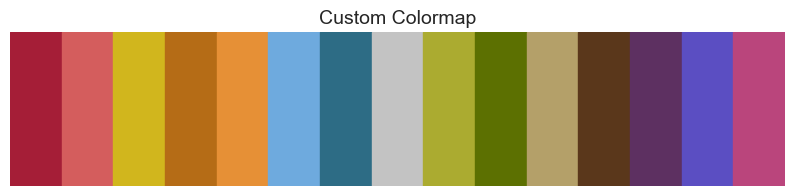

In [44]:
# define colors for the models

# base colors of QDS
base_colors = {
    "red": (165/255, 30/255, 55/255),
    "gray": (195/255, 195/255, 195/255),
    "lightgray": (203/255, 203/255, 203/255),
    "gold": (180/255, 160/255, 105/255),
}

hex_colors = [
    "#A51E37", "#D45D5D", "#D1B61D", "#B56C16", "#E69036",
    "#6EAADE", "#2D6C85", "#C3C3C3", "#ABAB30", "#5C7001",
    "#B4A069", "#5A371B", "#5D3061", "#5B4EC2", "#BA457C"
]

# Create a ListedColormap
custom_cmap = ListedColormap(hex_colors, name = "custom15")


# Visualize the colors
fig, ax = plt.subplots(figsize=(10, 2))
for i, color in enumerate(hex_colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, len(hex_colors))
ax.set_ylim(0, 1)
ax.axis("off")
plt.title("Custom Colormap", fontsize=14)
plt.show()

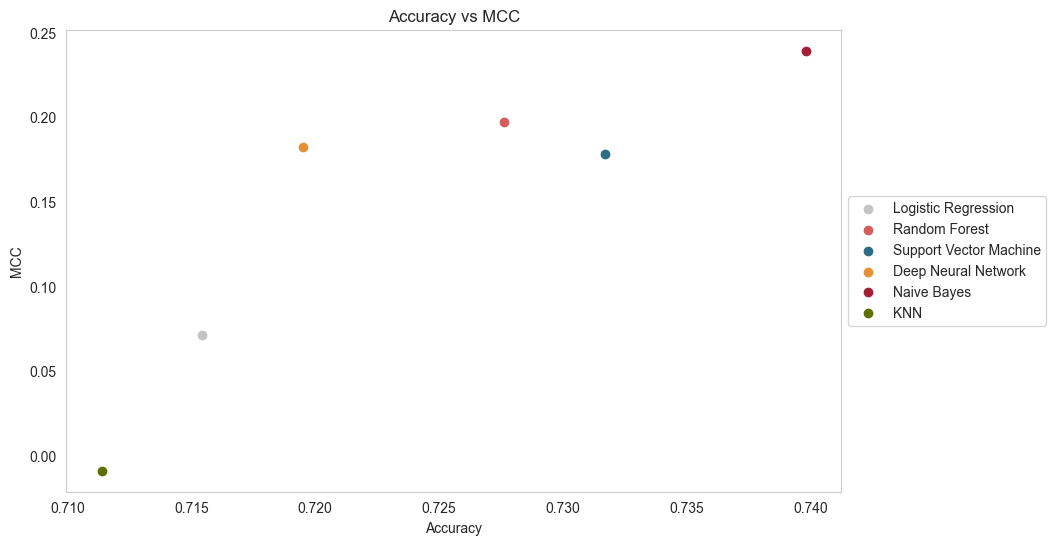

In [45]:
# plot accuracy (x-axis) and mcc (y-axis) for all models
plt.figure(figsize = (10, 6))

plt.scatter(metrics_lr["accuracy"], metrics_lr["mcc"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["accuracy"], metrics_rf["mcc"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["accuracy"], metrics_svc["mcc"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["accuracy"], metrics_dnn["mcc"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["accuracy"], metrics_nb["mcc"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["accuracy"], metrics_knn["mcc"], label = "KNN", color = hex_colors[9])

# plt.xlim(0, 1)
# plt.ylim(-1, 1)

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()
# plt.show()

# save as png
plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_ML.png", dpi = 300, bbox_inches = "tight")

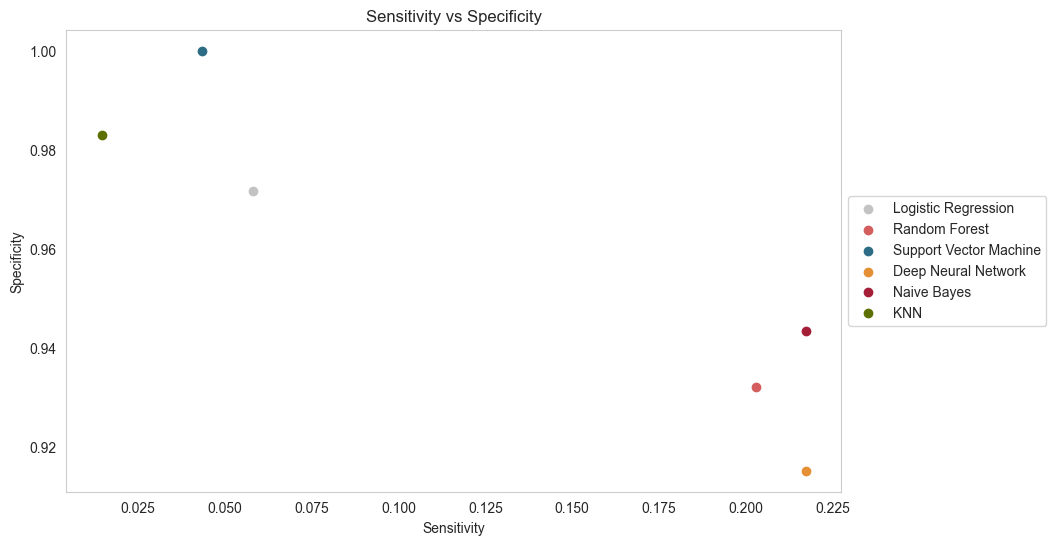

In [46]:
# sensitivity vs specificity
plt.figure(figsize = (10, 6))

plt.scatter(metrics_lr["sensitivity"], metrics_lr["specificity"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["sensitivity"], metrics_rf["specificity"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["sensitivity"], metrics_svc["specificity"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["sensitivity"], metrics_dnn["specificity"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["sensitivity"], metrics_nb["specificity"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["sensitivity"], metrics_knn["specificity"], label = "KNN", color = hex_colors[9])

# plt.xlim(0, 1)
# plt.ylim(0, 1)

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
plt.savefig("../doc/figs/01_LLM_ML_performance/sensitivity_specificity_ML.png", dpi = 300, bbox_inches = "tight")

**Sensitivity** = Wie viel Prozent der predicted positives sind wirklich positiv. Wie viele der tatsächlich kranken Personen hat das Model erkannt?

**Specificity** = Wie viel Prozent der predicted negatives sind wirklich negativ. Wie viele der tatsächlich gesunden Personen hat das Model richtig ausgeschlossen (negativ predicted)?

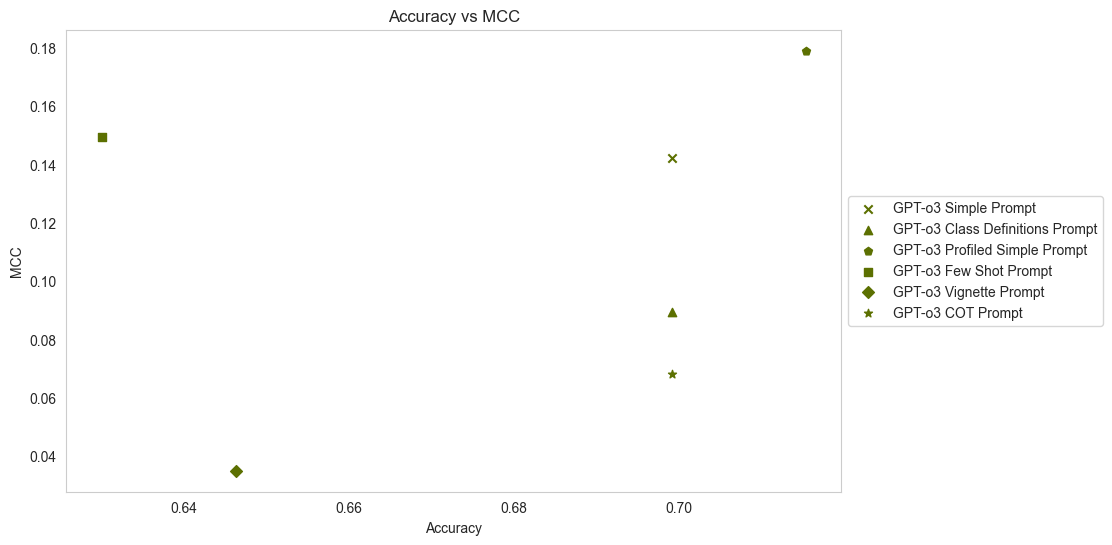

In [47]:
# plot all simple prompts for LLMs: MCC vs Accuracy
plt.figure(figsize = (10, 6))

# plt.scatter(metrics_GPT_simple_prompt["accuracy"], metrics_GPT_simple_prompt["mcc"], label = "GPT-4.1 Simple Prompt", color = hex_colors[9], marker = "x")
# plt.scatter(metrics_GPT_class_def_prompt["accuracy"], metrics_GPT_class_def_prompt["mcc"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[9], marker = "^")
# plt.scatter(metrics_GPT_profiled_simple_prompt["accuracy"], metrics_GPT_profiled_simple_prompt["mcc"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
# plt.scatter(metrics_GPT_few_shot_prompt["accuracy"], metrics_GPT_few_shot_prompt["mcc"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[9], marker = "s")
# plt.scatter(metrics_GPT_vignette_prompt["accuracy"], metrics_GPT_vignette_prompt["mcc"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[9], marker = "D")
# plt.scatter(metrics_GPT_cot_prompt["accuracy"], metrics_GPT_cot_prompt["mcc"], label = "GPT-4.1 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_GPT_o3_simple_prompt["accuracy"], metrics_GPT_o3_simple_prompt["mcc"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["accuracy"], metrics_GPT_o3_class_definitions_prompt["mcc"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["accuracy"], metrics_GPT_o3_profiled_simple_prompt["mcc"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["accuracy"], metrics_GPT_o3_few_shot_prompt["mcc"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["accuracy"], metrics_GPT_o3_vignette_prompt["mcc"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["accuracy"], metrics_GPT_o3_cot_prompt["mcc"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

# plt.xlim(0.3, 0.7)
# plt.ylim(-0.05, 0.25)

# plt.xlim(0, 1.02)
# plt.ylim(-1.02, 1.02)

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_all_models.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs_ML_0_1.png", dpi = 300, bbox_inches = "tight")

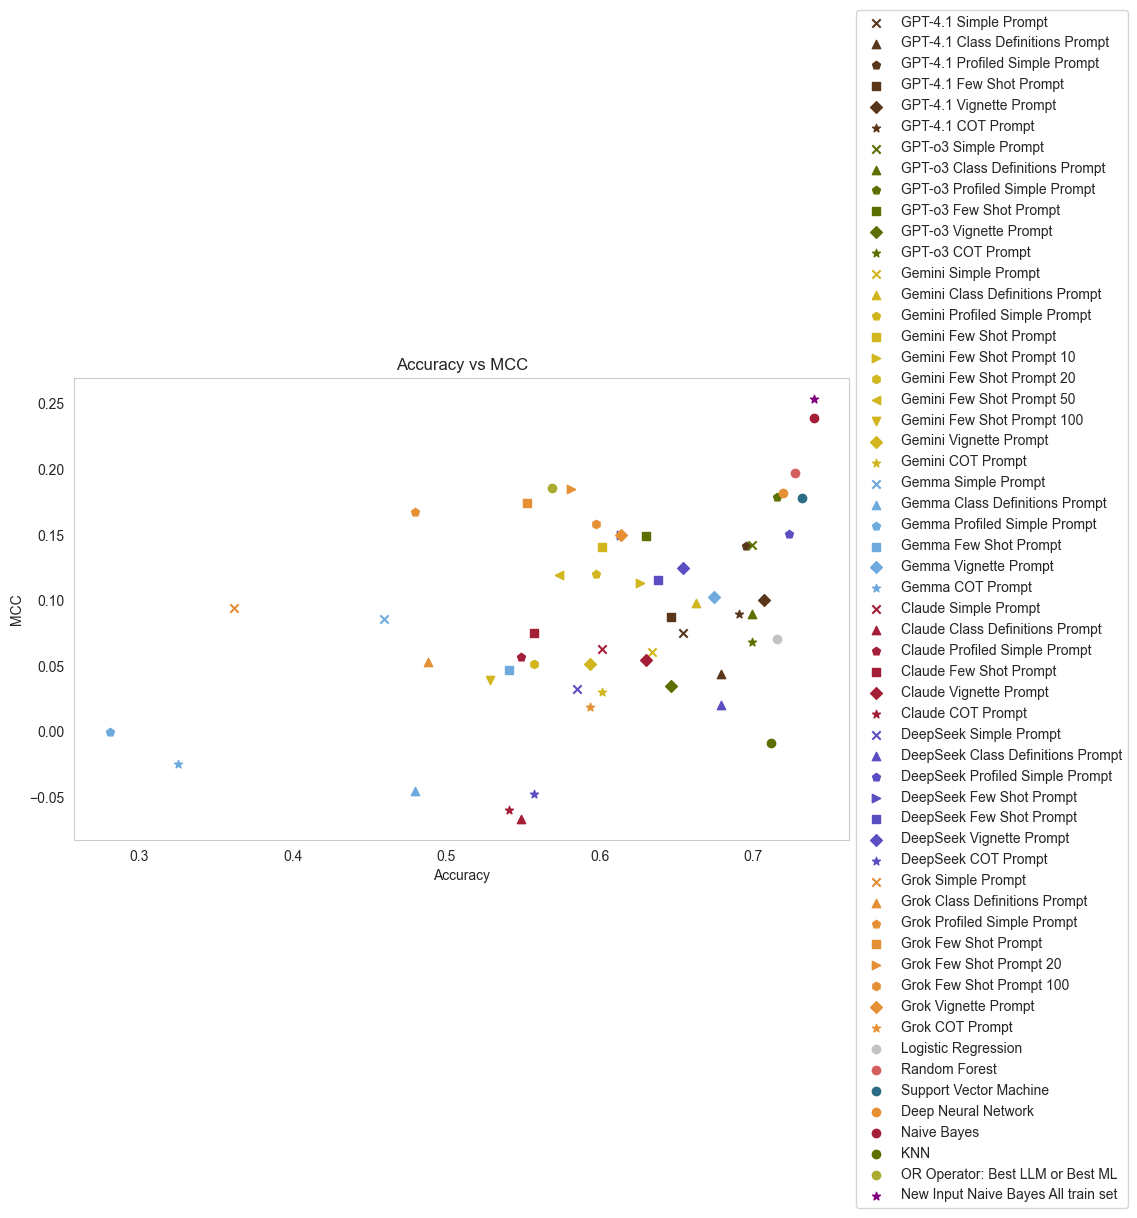

In [48]:
# plot all simple prompts for LLMs: MCC vs Accuracy
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_simple_prompt["accuracy"], metrics_GPT_simple_prompt["mcc"], label = "GPT-4.1 Simple Prompt", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_class_def_prompt["accuracy"], metrics_GPT_class_def_prompt["mcc"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[11], marker = "^")
plt.scatter(metrics_GPT_profiled_simple_prompt["accuracy"], metrics_GPT_profiled_simple_prompt["mcc"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[11], marker = "p")
plt.scatter(metrics_GPT_few_shot_prompt["accuracy"], metrics_GPT_few_shot_prompt["mcc"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[11], marker = "s")
plt.scatter(metrics_GPT_vignette_prompt["accuracy"], metrics_GPT_vignette_prompt["mcc"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[11], marker = "D")
plt.scatter(metrics_GPT_cot_prompt["accuracy"], metrics_GPT_cot_prompt["mcc"], label = "GPT-4.1 COT Prompt", color = hex_colors[11], marker = "*")

plt.scatter(metrics_GPT_o3_simple_prompt["accuracy"], metrics_GPT_o3_simple_prompt["mcc"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["accuracy"], metrics_GPT_o3_class_definitions_prompt["mcc"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["accuracy"], metrics_GPT_o3_profiled_simple_prompt["mcc"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["accuracy"], metrics_GPT_o3_few_shot_prompt["mcc"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["accuracy"], metrics_GPT_o3_vignette_prompt["mcc"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["accuracy"], metrics_GPT_o3_cot_prompt["mcc"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_Gemini_simple_prompt["accuracy"], metrics_Gemini_simple_prompt["mcc"], label = "Gemini Simple Prompt", color = hex_colors[2], marker = "x")
plt.scatter(metrics_Gemini_class_def_prompt["accuracy"], metrics_Gemini_class_def_prompt["mcc"], label = "Gemini Class Definitions Prompt", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_profiled_simple_prompt["accuracy"], metrics_Gemini_profiled_simple_prompt["mcc"], label = "Gemini Profiled Simple Prompt", color = hex_colors[2], marker = "p")
plt.scatter(metrics_Gemini_few_shot_prompt["accuracy"], metrics_Gemini_few_shot_prompt["mcc"], label = "Gemini Few Shot Prompt", color = hex_colors[2], marker = "s")
plt.scatter(metrics_Gemini_few_shot_prompt_10["accuracy"], metrics_Gemini_few_shot_prompt_10["mcc"], label = "Gemini Few Shot Prompt 10", color = hex_colors[2], marker = ">")
plt.scatter(metrics_Gemini_few_shot_prompt_20["accuracy"], metrics_Gemini_few_shot_prompt_20["mcc"], label = "Gemini Few Shot Prompt 20", color = hex_colors[2], marker = "h")
plt.scatter(metrics_Gemini_few_shot_prompt_50["accuracy"], metrics_Gemini_few_shot_prompt_50["mcc"], label = "Gemini Few Shot Prompt 50", color = hex_colors[2], marker = "<")
plt.scatter(metrics_Gemini_few_shot_prompt_100["accuracy"], metrics_Gemini_few_shot_prompt_100["mcc"], label = "Gemini Few Shot Prompt 100", color = hex_colors[2], marker = "v")
plt.scatter(metrics_Gemini_vignette_prompt["accuracy"], metrics_Gemini_vignette_prompt["mcc"], label = "Gemini Vignette Prompt", color = hex_colors[2], marker = "D")
plt.scatter(metrics_Gemini_cot_prompt["accuracy"], metrics_Gemini_cot_prompt["mcc"], label = "Gemini COT Prompt", color = hex_colors[2], marker = "*")

plt.scatter(metrics_Gemma_simple_prompt["accuracy"], metrics_Gemma_simple_prompt["mcc"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["accuracy"], metrics_Gemma_class_def_prompt["mcc"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["accuracy"], metrics_Gemma_profiled_simple_prompt["mcc"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "p")
plt.scatter(metrics_Gemma_few_shot_prompt["accuracy"], metrics_Gemma_few_shot_prompt["mcc"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["accuracy"], metrics_Gemma_vignette_prompt["mcc"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["accuracy"], metrics_Gemma_cot_prompt["mcc"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")

plt.scatter(metrics_Claude_4_simple_prompt["accuracy"], metrics_Claude_4_simple_prompt["mcc"], label = "Claude Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["accuracy"], metrics_Claude_4_class_def_prompt["mcc"], label = "Claude Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["accuracy"], metrics_Claude_4_profiled_simple_prompt["mcc"], label = "Claude Profiled Simple Prompt", color = hex_colors[0], marker = "p")
plt.scatter(metrics_Claude_4_few_shot_prompt["accuracy"], metrics_Claude_4_few_shot_prompt["mcc"], label = "Claude Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["accuracy"], metrics_Claude_4_vignette_prompt["mcc"], label = "Claude Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["accuracy"], metrics_Claude_4_cot_prompt["mcc"], label = "Claude COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["accuracy"], metrics_DeepSeek_simple_prompt["mcc"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["accuracy"], metrics_DeepSeek_class_def_prompt["mcc"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["accuracy"], metrics_DeepSeek_profiled_simple_prompt["mcc"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "p")
plt.scatter(metrics_DeepSeek_few_shot_prompt_20["accuracy"], metrics_DeepSeek_few_shot_prompt_20["mcc"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = ">")
plt.scatter(metrics_DeepSeek_few_shot_prompt["accuracy"], metrics_DeepSeek_few_shot_prompt["mcc"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["accuracy"], metrics_DeepSeek_vignette_prompt["mcc"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["accuracy"], metrics_DeepSeek_cot_prompt["mcc"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["accuracy"], metrics_Grok_simple_prompt["mcc"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["accuracy"], metrics_Grok_class_def_prompt["mcc"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["accuracy"], metrics_Grok_profiled_simple_prompt["mcc"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "p")
plt.scatter(metrics_Grok_few_shot_prompt["accuracy"], metrics_Grok_few_shot_prompt["mcc"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_few_shot_prompt_20["accuracy"], metrics_Grok_few_shot_prompt_20["mcc"], label = "Grok Few Shot Prompt 20", color = hex_colors[4], marker = ">")
plt.scatter(metrics_Grok_few_shot_prompt_100["accuracy"], metrics_Grok_few_shot_prompt_100["mcc"], label = "Grok Few Shot Prompt 100", color = hex_colors[4], marker = "h")
plt.scatter(metrics_Grok_vignette_prompt["accuracy"], metrics_Grok_vignette_prompt["mcc"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["accuracy"], metrics_Grok_cot_prompt["mcc"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")

plt.scatter(metrics_lr["accuracy"], metrics_lr["mcc"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["accuracy"], metrics_rf["mcc"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["accuracy"], metrics_svc["mcc"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["accuracy"], metrics_dnn["mcc"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["accuracy"], metrics_nb["mcc"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["accuracy"], metrics_knn["mcc"], label = "KNN", color = hex_colors[9])


plt.scatter(metrics_best_LLM_or_best_ML["accuracy"], metrics_best_LLM_or_best_ML["mcc"], label = "OR Operator: Best LLM or Best ML", color = hex_colors[8], marker = "o")
# # plt.scatter(metrics_OR_best_LLMs["accuracy"], metrics_OR_best_LLMs["mcc"], label = "OR Operator: Two Best LLMs", color = hex_colors[9], marker = "o")
#
#
# plt.scatter(metrics_pov_all_models["accuracy"], metrics_pov_all_models["mcc"], label = "POV All Models", color = "black", marker = "P")
# plt.scatter(metrics_pov_ml_votes["accuracy"], metrics_pov_ml_votes["mcc"], label = "POV ML Votes", color = "black", marker = "X")
# plt.scatter(metrics_pov_llm_votes["accuracy"], metrics_pov_llm_votes["mcc"], label = "POV LLM Votes", color = "black", marker = "p")
# plt.scatter(metrics_pov_simple_votes["accuracy"], metrics_pov_simple_votes["mcc"], label = "POV Simple Votes", color = "black", marker = "x")
# plt.scatter(metrics_pov_class_definitions_votes["accuracy"], metrics_pov_class_definitions_votes["mcc"], label = "POV Class Definitions Votes", color = "black", marker = "^")
# plt.scatter(metrics_pov_profiled_simple_votes["accuracy"], metrics_pov_profiled_simple_votes["mcc"], label = "POV Profiled Simple Votes", color = "black", marker = "p")
# plt.scatter(metrics_pov_few_shot_votes["accuracy"], metrics_pov_few_shot_votes["mcc"], label = "POV Few Shot Votes", color = "black", marker = "s")
# plt.scatter(metrics_pov_vignette_votes["accuracy"], metrics_pov_vignette_votes["mcc"], label = "POV Vignette Votes", color = "black", marker = "D")
# plt.scatter(metrics_pov_cot_votes["accuracy"], metrics_pov_cot_votes["mcc"], label = "POV COT Votes", color = "black", marker = "*")


# plt.scatter(metrics_new_input_dnn["accuracy"], metrics_new_input_dnn["mcc"], label = "New Input DNN", color = "green", marker = "s")
# plt.scatter(metrics_new_input_svc["accuracy"], metrics_new_input_svc["mcc"], label = "New Input SVC", color = "orange", marker = "D")
plt.scatter(metrics_new_input_nb["accuracy"], metrics_new_input_nb["mcc"], label = "New Input Naive Bayes All train set", color = "purple", marker = "*")

# plt.xlim(0.3, 0.7)
# plt.ylim(-0.05, 0.25)

# plt.xlim(0, 1.02)
# plt.ylim(-1.02, 1.02)

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_all_models.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs_ML_0_1.png", dpi = 300, bbox_inches = "tight")

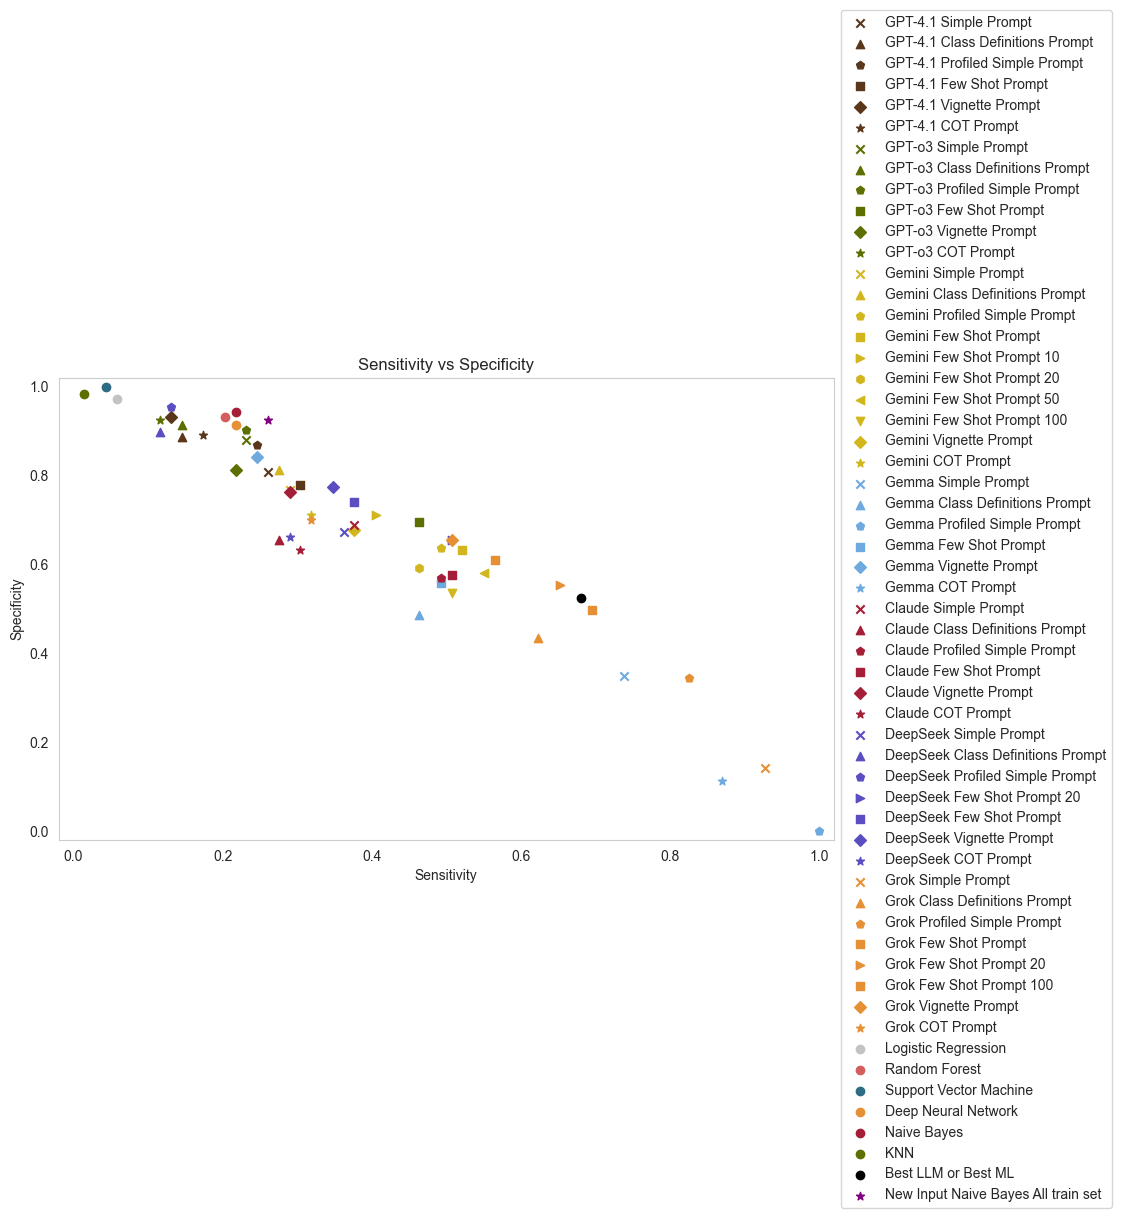

In [49]:
# plot sensitivity vs specificity for all simple prompts
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_simple_prompt["sensitivity"], metrics_GPT_simple_prompt["specificity"], label = "GPT-4.1 Simple Prompt", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_class_def_prompt["sensitivity"], metrics_GPT_class_def_prompt["specificity"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[11], marker = "^")
plt.scatter(metrics_GPT_profiled_simple_prompt["sensitivity"], metrics_GPT_profiled_simple_prompt["specificity"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[11], marker = "p")
plt.scatter(metrics_GPT_few_shot_prompt["sensitivity"], metrics_GPT_few_shot_prompt["specificity"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[11], marker = "s")
plt.scatter(metrics_GPT_vignette_prompt["sensitivity"], metrics_GPT_vignette_prompt["specificity"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[11], marker = "D")
plt.scatter(metrics_GPT_cot_prompt["sensitivity"], metrics_GPT_cot_prompt["specificity"], label = "GPT-4.1 COT Prompt", color = hex_colors[11], marker = "*")

plt.scatter(metrics_GPT_o3_simple_prompt["sensitivity"], metrics_GPT_o3_simple_prompt["specificity"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["sensitivity"], metrics_GPT_o3_class_definitions_prompt["specificity"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["sensitivity"], metrics_GPT_o3_profiled_simple_prompt["specificity"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["sensitivity"], metrics_GPT_o3_few_shot_prompt["specificity"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["sensitivity"], metrics_GPT_o3_vignette_prompt["specificity"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["sensitivity"], metrics_GPT_o3_cot_prompt["specificity"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_Gemini_simple_prompt["sensitivity"], metrics_Gemini_simple_prompt["specificity"], label = "Gemini Simple Prompt", color = hex_colors[2], marker = "x")
plt.scatter(metrics_Gemini_class_def_prompt["sensitivity"], metrics_Gemini_class_def_prompt["specificity"], label = "Gemini Class Definitions Prompt", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_profiled_simple_prompt["sensitivity"], metrics_Gemini_profiled_simple_prompt["specificity"], label = "Gemini Profiled Simple Prompt", color = hex_colors[2], marker = "p")
plt.scatter(metrics_Gemini_few_shot_prompt["sensitivity"], metrics_Gemini_few_shot_prompt["specificity"], label = "Gemini Few Shot Prompt", color = hex_colors[2], marker = "s")
plt.scatter(metrics_Gemini_few_shot_prompt_10["sensitivity"], metrics_Gemini_few_shot_prompt_10["specificity"], label = "Gemini Few Shot Prompt 10", color = hex_colors[2], marker = ">")
plt.scatter(metrics_Gemini_few_shot_prompt_20["sensitivity"], metrics_Gemini_few_shot_prompt_20["specificity"], label = "Gemini Few Shot Prompt 20", color = hex_colors[2], marker = "h")
plt.scatter(metrics_Gemini_few_shot_prompt_50["sensitivity"], metrics_Gemini_few_shot_prompt_50["specificity"], label = "Gemini Few Shot Prompt 50", color = hex_colors[2], marker = "<")
plt.scatter(metrics_Gemini_few_shot_prompt_100["sensitivity"], metrics_Gemini_few_shot_prompt_100["specificity"], label = "Gemini Few Shot Prompt 100", color = hex_colors[2], marker = "v")
plt.scatter(metrics_Gemini_vignette_prompt["sensitivity"], metrics_Gemini_vignette_prompt["specificity"], label = "Gemini Vignette Prompt", color = hex_colors[2], marker = "D")
plt.scatter(metrics_Gemini_cot_prompt["sensitivity"], metrics_Gemini_cot_prompt["specificity"], label = "Gemini COT Prompt", color = hex_colors[2], marker = "*")

plt.scatter(metrics_Gemma_simple_prompt["sensitivity"], metrics_Gemma_simple_prompt["specificity"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["sensitivity"], metrics_Gemma_class_def_prompt["specificity"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["sensitivity"], metrics_Gemma_profiled_simple_prompt["specificity"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "p")
plt.scatter(metrics_Gemma_few_shot_prompt["sensitivity"], metrics_Gemma_few_shot_prompt["specificity"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["sensitivity"], metrics_Gemma_vignette_prompt["specificity"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["sensitivity"], metrics_Gemma_cot_prompt["specificity"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")

plt.scatter(metrics_Claude_4_simple_prompt["sensitivity"], metrics_Claude_4_simple_prompt["specificity"], label = "Claude Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["sensitivity"], metrics_Claude_4_class_def_prompt["specificity"], label = "Claude Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["sensitivity"], metrics_Claude_4_profiled_simple_prompt["specificity"], label = "Claude Profiled Simple Prompt", color = hex_colors[0], marker = "p")
plt.scatter(metrics_Claude_4_few_shot_prompt["sensitivity"], metrics_Claude_4_few_shot_prompt["specificity"], label = "Claude Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["sensitivity"], metrics_Claude_4_vignette_prompt["specificity"], label = "Claude Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["sensitivity"], metrics_Claude_4_cot_prompt["specificity"], label = "Claude COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["sensitivity"], metrics_DeepSeek_simple_prompt["specificity"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["sensitivity"], metrics_DeepSeek_class_def_prompt["specificity"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["sensitivity"], metrics_DeepSeek_profiled_simple_prompt["specificity"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "p")
plt.scatter(metrics_DeepSeek_few_shot_prompt_20["sensitivity"], metrics_DeepSeek_few_shot_prompt_20["specificity"], label = "DeepSeek Few Shot Prompt 20", color = hex_colors[13], marker = ">")
plt.scatter(metrics_DeepSeek_few_shot_prompt["sensitivity"], metrics_DeepSeek_few_shot_prompt["specificity"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["sensitivity"], metrics_DeepSeek_vignette_prompt["specificity"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["sensitivity"], metrics_DeepSeek_cot_prompt["specificity"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["sensitivity"], metrics_Grok_simple_prompt["specificity"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["sensitivity"], metrics_Grok_class_def_prompt["specificity"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["sensitivity"], metrics_Grok_profiled_simple_prompt["specificity"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "p")
plt.scatter(metrics_Grok_few_shot_prompt["sensitivity"], metrics_Grok_few_shot_prompt["specificity"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_few_shot_prompt_20["sensitivity"], metrics_Grok_few_shot_prompt_20["specificity"], label = "Grok Few Shot Prompt 20", color = hex_colors[4], marker = ">")
plt.scatter(metrics_Grok_few_shot_prompt_100["sensitivity"], metrics_Grok_few_shot_prompt_100["specificity"], label = "Grok Few Shot Prompt 100", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_vignette_prompt["sensitivity"], metrics_Grok_vignette_prompt["specificity"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["sensitivity"], metrics_Grok_cot_prompt["specificity"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")

plt.scatter(metrics_lr["sensitivity"], metrics_lr["specificity"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["sensitivity"], metrics_rf["specificity"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["sensitivity"], metrics_svc["specificity"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["sensitivity"], metrics_dnn["specificity"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["sensitivity"], metrics_nb["specificity"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["sensitivity"], metrics_knn["specificity"], label = "KNN", color = hex_colors[9])


# plt.scatter(metrics_pov_all_models["sensitivity"], metrics_pov_all_models["specificity"], label = "POV All Models", color = "black", marker = "P")
# plt.scatter(metrics_pov_ml_votes["sensitivity"], metrics_pov_ml_votes["specificity"], label = "POV ML Votes", color = "black", marker = "X")
# plt.scatter(metrics_pov_simple_votes["sensitivity"], metrics_pov_simple_votes["specificity"], label = "POV Simple Votes", color = "black", marker = "x")
# plt.scatter(metrics_pov_class_definitions_votes["sensitivity"], metrics_pov_class_definitions_votes["specificity"], label = "POV Class Definitions Votes", color = "black", marker = "^")
# plt.scatter(metrics_pov_profiled_simple_votes["sensitivity"], metrics_pov_profiled_simple_votes["specificity"], label = "POV Profiled Simple Votes", color = "black", marker = "p")
# plt.scatter(metrics_pov_few_shot_votes["sensitivity"], metrics_pov_few_shot_votes["specificity"], label = "POV Few Shot Votes", color = "black", marker = "s")
# plt.scatter(metrics_pov_vignette_votes["sensitivity"], metrics_pov_vignette_votes["specificity"], label = "POV Vignette Votes", color = "black", marker = "D")
# plt.scatter(metrics_pov_cot_votes["sensitivity"], metrics_pov_cot_votes["specificity"], label = "POV COT Votes", color = "black", marker = "*")

plt.scatter(metrics_best_LLM_or_best_ML["sensitivity"], metrics_best_LLM_or_best_ML["specificity"], label = "Best LLM or Best ML", color = "black", marker = "o")
#
# plt.scatter(metrics_new_input_dnn["sensitivity"], metrics_new_input_dnn["specificity"], label = "New Input DNN", color = "green", marker = "s")
# plt.scatter(metrics_new_input_svc["sensitivity"], metrics_new_input_svc["specificity"], label = "New Input SVC", color = "green", marker = "o")
plt.scatter(metrics_new_input_nb["sensitivity"], metrics_new_input_nb["specificity"], label = "New Input Naive Bayes All train set", color = "purple", marker = "*")

plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/sensitivity_specificity_LLMs.png", dpi = 300, bbox_inches = "tight")

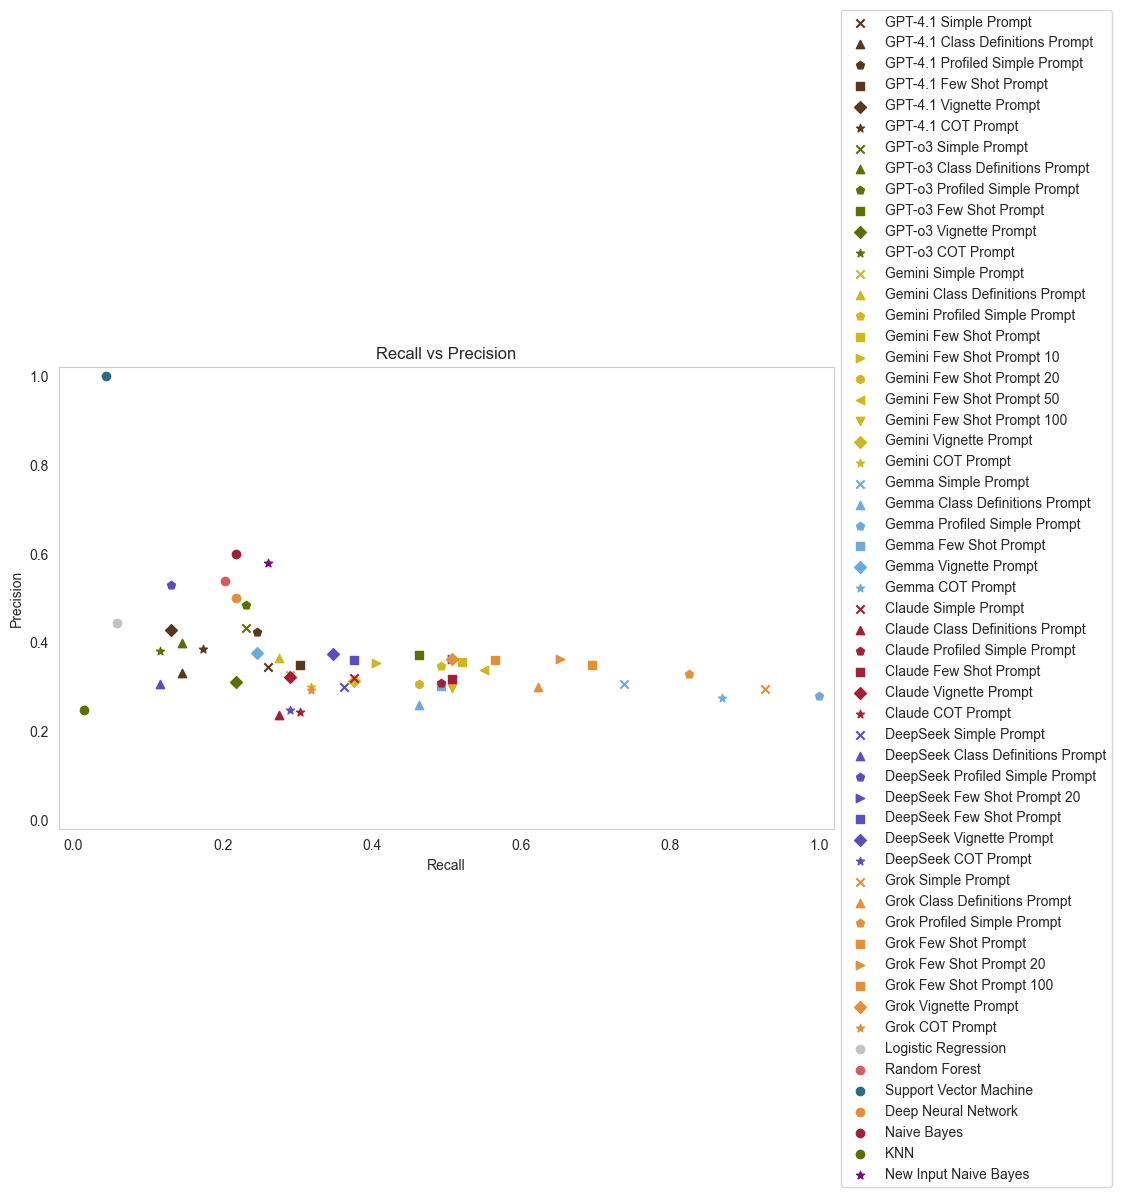

In [50]:
# recall vs precision
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_simple_prompt["recall"], metrics_GPT_simple_prompt["precision"], label = "GPT-4.1 Simple Prompt", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_class_def_prompt["recall"], metrics_GPT_class_def_prompt["precision"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[11], marker = "^")
plt.scatter(metrics_GPT_profiled_simple_prompt["recall"], metrics_GPT_profiled_simple_prompt["precision"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[11], marker = "p")
plt.scatter(metrics_GPT_few_shot_prompt["recall"], metrics_GPT_few_shot_prompt["precision"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[11], marker = "s")
plt.scatter(metrics_GPT_vignette_prompt["recall"], metrics_GPT_vignette_prompt["precision"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[11], marker = "D")
plt.scatter(metrics_GPT_cot_prompt["recall"], metrics_GPT_cot_prompt["precision"], label = "GPT-4.1 COT Prompt", color = hex_colors[11], marker = "*")

plt.scatter(metrics_GPT_o3_simple_prompt["recall"], metrics_GPT_o3_simple_prompt["precision"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["recall"], metrics_GPT_o3_class_definitions_prompt["precision"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["recall"], metrics_GPT_o3_profiled_simple_prompt["precision"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["recall"], metrics_GPT_o3_few_shot_prompt["precision"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["recall"], metrics_GPT_o3_vignette_prompt["precision"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["recall"], metrics_GPT_o3_cot_prompt["precision"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_Gemini_simple_prompt["recall"], metrics_Gemini_simple_prompt["precision"], label = "Gemini Simple Prompt", color = hex_colors[2], marker = "x")
plt.scatter(metrics_Gemini_class_def_prompt["recall"], metrics_Gemini_class_def_prompt["precision"], label = "Gemini Class Definitions Prompt", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_profiled_simple_prompt["recall"], metrics_Gemini_profiled_simple_prompt["precision"], label = "Gemini Profiled Simple Prompt", color = hex_colors[2], marker = "p")
plt.scatter(metrics_Gemini_few_shot_prompt["recall"], metrics_Gemini_few_shot_prompt["precision"], label = "Gemini Few Shot Prompt", color = hex_colors[2], marker = "s")
plt.scatter(metrics_Gemini_few_shot_prompt_10["recall"], metrics_Gemini_few_shot_prompt_10["precision"], label = "Gemini Few Shot Prompt 10", color = hex_colors[2], marker = ">")
plt.scatter(metrics_Gemini_few_shot_prompt_20["recall"], metrics_Gemini_few_shot_prompt_20["precision"], label = "Gemini Few Shot Prompt 20", color = hex_colors[2], marker = "h")
plt.scatter(metrics_Gemini_few_shot_prompt_50["recall"], metrics_Gemini_few_shot_prompt_50["precision"], label = "Gemini Few Shot Prompt 50", color = hex_colors[2], marker = "<")
plt.scatter(metrics_Gemini_few_shot_prompt_100["recall"], metrics_Gemini_few_shot_prompt_100["precision"], label = "Gemini Few Shot Prompt 100", color = hex_colors[2], marker = "v")
plt.scatter(metrics_Gemini_vignette_prompt["recall"], metrics_Gemini_vignette_prompt["precision"], label = "Gemini Vignette Prompt", color = hex_colors[2], marker = "D")
plt.scatter(metrics_Gemini_cot_prompt["recall"], metrics_Gemini_cot_prompt["precision"], label = "Gemini COT Prompt", color = hex_colors[2], marker = "*")

plt.scatter(metrics_Gemma_simple_prompt["recall"], metrics_Gemma_simple_prompt["precision"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["recall"], metrics_Gemma_class_def_prompt["precision"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["recall"], metrics_Gemma_profiled_simple_prompt["precision"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "p")
plt.scatter(metrics_Gemma_few_shot_prompt["recall"], metrics_Gemma_few_shot_prompt["precision"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["recall"], metrics_Gemma_vignette_prompt["precision"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["recall"], metrics_Gemma_cot_prompt["precision"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")

plt.scatter(metrics_Claude_4_simple_prompt["recall"], metrics_Claude_4_simple_prompt["precision"], label = "Claude Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["recall"], metrics_Claude_4_class_def_prompt["precision"], label = "Claude Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["recall"], metrics_Claude_4_profiled_simple_prompt["precision"], label = "Claude Profiled Simple Prompt", color = hex_colors[0], marker = "p")
plt.scatter(metrics_Claude_4_few_shot_prompt["recall"], metrics_Claude_4_few_shot_prompt["precision"], label = "Claude Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["recall"], metrics_Claude_4_vignette_prompt["precision"], label = "Claude Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["recall"], metrics_Claude_4_cot_prompt["precision"], label = "Claude COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["recall"], metrics_DeepSeek_simple_prompt["precision"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["recall"], metrics_DeepSeek_class_def_prompt["precision"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["recall"], metrics_DeepSeek_profiled_simple_prompt["precision"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "p")
plt.scatter(metrics_DeepSeek_few_shot_prompt_20["recall"], metrics_DeepSeek_few_shot_prompt_20["precision"], label = "DeepSeek Few Shot Prompt 20", color = hex_colors[13], marker = ">")
plt.scatter(metrics_DeepSeek_few_shot_prompt["recall"], metrics_DeepSeek_few_shot_prompt["precision"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["recall"], metrics_DeepSeek_vignette_prompt["precision"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["recall"], metrics_DeepSeek_cot_prompt["precision"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["recall"], metrics_Grok_simple_prompt["precision"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["recall"], metrics_Grok_class_def_prompt["precision"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["recall"], metrics_Grok_profiled_simple_prompt["precision"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "p")
plt.scatter(metrics_Grok_few_shot_prompt["recall"], metrics_Grok_few_shot_prompt["precision"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_few_shot_prompt_20["recall"], metrics_Grok_few_shot_prompt_20["precision"], label = "Grok Few Shot Prompt 20", color = hex_colors[4], marker = ">")
plt.scatter(metrics_Grok_few_shot_prompt_100["recall"], metrics_Grok_few_shot_prompt_100["precision"], label = "Grok Few Shot Prompt 100", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_vignette_prompt["recall"], metrics_Grok_vignette_prompt["precision"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["recall"], metrics_Grok_cot_prompt["precision"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")

plt.scatter(metrics_lr["recall"], metrics_lr["precision"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["recall"], metrics_rf["precision"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["recall"], metrics_svc["precision"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["recall"], metrics_dnn["precision"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["recall"], metrics_nb["precision"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["recall"], metrics_knn["precision"], label = "KNN", color = hex_colors[9])

plt.scatter(metrics_new_input_nb["recall"], metrics_new_input_nb["precision"], label = "New Input Naive Bayes", color = "purple", marker = "*")


plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall vs Precision")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

## Unification Approaches

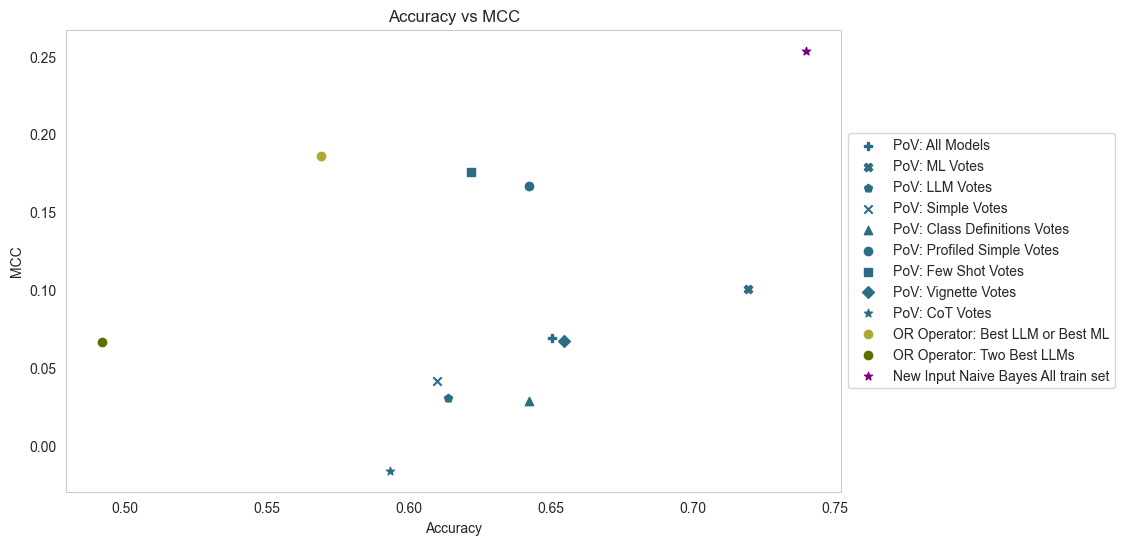

In [51]:
# plot all unification approaches: MCC vs Accuracy
plt.figure(figsize = (10, 6))

plt.scatter(metrics_pov_all_models["accuracy"], metrics_pov_all_models["mcc"], label = "PoV: All Models", color = hex_colors[6], marker = "P")
plt.scatter(metrics_pov_ml_votes["accuracy"], metrics_pov_ml_votes["mcc"], label = "PoV: ML Votes", color = hex_colors[6], marker = "X")
plt.scatter(metrics_pov_llm_votes["accuracy"], metrics_pov_llm_votes["mcc"], label = "PoV: LLM Votes", color = hex_colors[6], marker = "p")
plt.scatter(metrics_pov_simple_votes["accuracy"], metrics_pov_simple_votes["mcc"], label = "PoV: Simple Votes", color = hex_colors[6], marker = "x")
plt.scatter(metrics_pov_class_definitions_votes["accuracy"], metrics_pov_class_definitions_votes["mcc"], label = "PoV: Class Definitions Votes", color = hex_colors[6], marker = "^")
plt.scatter(metrics_pov_profiled_simple_votes["accuracy"], metrics_pov_profiled_simple_votes["mcc"], label = "PoV: Profiled Simple Votes", color = hex_colors[6], marker = "o")
plt.scatter(metrics_pov_few_shot_votes["accuracy"], metrics_pov_few_shot_votes["mcc"], label = "PoV: Few Shot Votes", color = hex_colors[6], marker = "s")
plt.scatter(metrics_pov_vignette_votes["accuracy"], metrics_pov_vignette_votes["mcc"], label = "PoV: Vignette Votes", color = hex_colors[6], marker = "D")
plt.scatter(metrics_pov_cot_votes["accuracy"], metrics_pov_cot_votes["mcc"], label = "PoV: CoT Votes", color = hex_colors[6], marker = "*")

plt.scatter(metrics_best_LLM_or_best_ML["accuracy"], metrics_best_LLM_or_best_ML["mcc"], label = "OR Operator: Best LLM or Best ML", color = hex_colors[8], marker = "o")
plt.scatter(metrics_OR_best_LLMs["accuracy"], metrics_OR_best_LLMs["mcc"], label = "OR Operator: Two Best LLMs", color = hex_colors[9], marker = "o")

# plt.scatter(metrics_new_input_dnn["accuracy"], metrics_new_input_dnn["mcc"], label = "New Input: DNN", color = "green", marker = "s")
# plt.scatter(metrics_new_input_svc["accuracy"], metrics_new_input_svc["mcc"], label = "New Input: SVC", color = "orange", marker = "D")
plt.scatter(metrics_new_input_nb["accuracy"], metrics_new_input_nb["mcc"], label = "New Input Naive Bayes All train set", color = "purple", marker = "*")

# plt.xlim(0.3, 0.7)
# plt.ylim(-0.05, 0.25)

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
plt.savefig("../doc/figs/02_unification_performance/accuracy_mcc_unification.png", dpi = 300, bbox_inches = "tight")

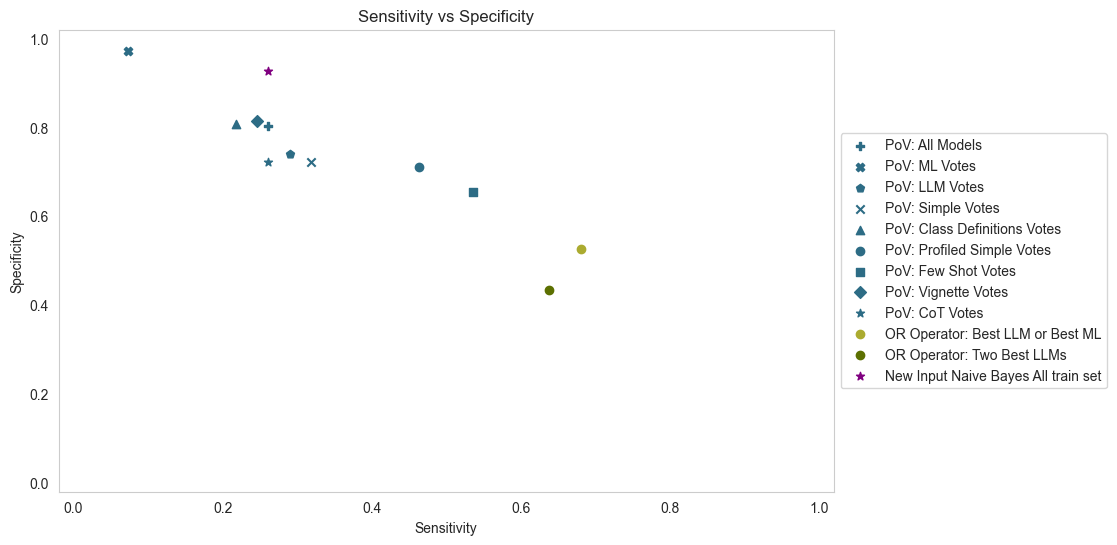

In [52]:
# plot sensitivity vs specificity for all unification approaches
plt.figure(figsize = (10, 6))

plt.scatter(metrics_pov_all_models["sensitivity"], metrics_pov_all_models["specificity"], label = "PoV: All Models", color = hex_colors[6], marker = "P")
plt.scatter(metrics_pov_ml_votes["sensitivity"], metrics_pov_ml_votes["specificity"], label = "PoV: ML Votes", color = hex_colors[6], marker = "X")
plt.scatter(metrics_pov_llm_votes["sensitivity"], metrics_pov_llm_votes["specificity"], label = "PoV: LLM Votes", color = hex_colors[6], marker = "p")
plt.scatter(metrics_pov_simple_votes["sensitivity"], metrics_pov_simple_votes["specificity"], label = "PoV: Simple Votes", color = hex_colors[6], marker = "x")
plt.scatter(metrics_pov_class_definitions_votes["sensitivity"], metrics_pov_class_definitions_votes["specificity"], label = "PoV: Class Definitions Votes", color = hex_colors[6], marker = "^")
plt.scatter(metrics_pov_profiled_simple_votes["sensitivity"], metrics_pov_profiled_simple_votes["specificity"], label = "PoV: Profiled Simple Votes", color = hex_colors[6], marker = "o")
plt.scatter(metrics_pov_few_shot_votes["sensitivity"], metrics_pov_few_shot_votes["specificity"], label = "PoV: Few Shot Votes", color = hex_colors[6], marker = "s")
plt.scatter(metrics_pov_vignette_votes["sensitivity"], metrics_pov_vignette_votes["specificity"], label = "PoV: Vignette Votes", color = hex_colors[6], marker = "D")
plt.scatter(metrics_pov_cot_votes["sensitivity"], metrics_pov_cot_votes["specificity"], label = "PoV: CoT Votes", color = hex_colors[6], marker = "*")

plt.scatter(metrics_best_LLM_or_best_ML["sensitivity"], metrics_best_LLM_or_best_ML["specificity"], label = "OR Operator: Best LLM or Best ML", color = hex_colors[8], marker = "o")
plt.scatter(metrics_OR_best_LLMs["sensitivity"], metrics_OR_best_LLMs["specificity"], label = "OR Operator: Two Best LLMs", color = hex_colors[9], marker = "o")

# plt.scatter(metrics_new_input_dnn["sensitivity"], metrics_new_input_dnn["specificity"], label = "New Input: DNN", color = "green", marker = "s")
# plt.scatter(metrics_new_input_svc["sensitivity"], metrics_new_input_svc["specificity"], label = "New Input: SVC", color = "orange", marker = "D")
plt.scatter(metrics_new_input_nb["sensitivity"], metrics_new_input_nb["specificity"], label = "New Input Naive Bayes All train set", color = "purple", marker = "*")

plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
plt.savefig("../doc/figs/02_unification_performance/sensitivity_specificity_unification.png", dpi = 300, bbox_inches = "tight")

# 3 Sensitivity vs Specificity

In [53]:
model_names = [
    "Logistic Regression", "Random Forest", "Support Vector Machine",
    "Deep Neural Network", "Naive Bayes", "KNN",
    "GPT-4.1 Simple Prompt", "GPT-4.1 Class Definitions Prompt",
    "GPT-4.1 Profiled Simple Prompt", "GPT-4.1 Few Shot Prompt",
    "GPT-4.1 Vignette Prompt", "GPT-4.1 COT Prompt",
    "GPT-o3 Simple Prompt", "GPT-o3 Class Definitions Prompt",
    "GPT-o3 Profiled Simple Prompt", "GPT-o3 Few Shot Prompt",
    "GPT-o3 Vignette Prompt", "GPT-o3 COT Prompt",
    "Gemini Simple Prompt", "Gemini Class Definitions Prompt",
    "Gemini Profiled Simple Prompt", "Gemini Few Shot Prompt",
    "Gemini Vignette Prompt", "Gemini COT Prompt",
    "Gemma Simple Prompt", "Gemma Class Definitions Prompt",
    "Gemma Profiled Simple Prompt", "Gemma Few Shot Prompt",
    "Gemma Vignette Prompt", "Gemma COT Prompt",
    "Claude 4 Simple Prompt", "Claude 4 Class Definitions Prompt",
    "Claude 4 Profiled Simple Prompt",
    "Claude 4 Few Shot Prompt", "Claude 4 Vignette Prompt",
    "Claude 4 COT Prompt", "DeepSeek Simple Prompt",
    "DeepSeek Class Definitions Prompt", "DeepSeek Profiled Simple Prompt",
    "DeepSeek Few Shot Prompt", "DeepSeek Vignette Prompt",
    "DeepSeek COT Prompt", "Grok Simple Prompt",
    "Grok Class Definitions Prompt", "Grok Profiled Simple Prompt",
    "Grok Few Shot Prompt", "Grok Vignette Prompt",
    "Grok COT Prompt", "POV All Models", "POV ML Votes",
    "POV Simple Votes", "POV Class Definitions Votes",
    "POV Profiled Simple Votes", "POV Few Shot Votes",
    "POV Vignette Votes", "POV COT Votes", "Best LLM or Best ML"
]

In [54]:
metrics = [
    metrics_lr, metrics_rf, metrics_svc, metrics_dnn, metrics_nb, metrics_knn,
    metrics_GPT_simple_prompt, metrics_GPT_class_def_prompt, metrics_GPT_profiled_simple_prompt,
    metrics_GPT_few_shot_prompt, metrics_GPT_vignette_prompt, metrics_GPT_cot_prompt,
    metrics_GPT_o3_simple_prompt, metrics_GPT_o3_class_definitions_prompt,
    metrics_GPT_o3_profiled_simple_prompt, metrics_GPT_o3_few_shot_prompt,
    metrics_GPT_o3_vignette_prompt, metrics_GPT_o3_cot_prompt,
    metrics_Gemini_simple_prompt, metrics_Gemini_class_def_prompt,
    metrics_Gemini_profiled_simple_prompt, metrics_Gemini_few_shot_prompt,
    metrics_Gemini_vignette_prompt, metrics_Gemini_cot_prompt,
    metrics_Gemma_simple_prompt, metrics_Gemma_class_def_prompt,
    metrics_Gemma_profiled_simple_prompt, metrics_Gemma_few_shot_prompt,
    metrics_Gemma_vignette_prompt, metrics_Gemma_cot_prompt,
    metrics_Claude_4_simple_prompt, metrics_Claude_4_class_def_prompt,
    metrics_Claude_4_profiled_simple_prompt, metrics_Claude_4_few_shot_prompt,
    metrics_Claude_4_vignette_prompt, metrics_Claude_4_cot_prompt,
    metrics_DeepSeek_simple_prompt, metrics_DeepSeek_class_def_prompt,
    metrics_DeepSeek_profiled_simple_prompt, metrics_DeepSeek_few_shot_prompt,
    metrics_DeepSeek_vignette_prompt, metrics_DeepSeek_cot_prompt,
    metrics_Grok_simple_prompt, metrics_Grok_class_def_prompt,
    metrics_Grok_profiled_simple_prompt, metrics_Grok_few_shot_prompt,
    metrics_Grok_vignette_prompt, metrics_Grok_cot_prompt,
    metrics_pov_all_models, metrics_pov_ml_votes, metrics_pov_simple_votes,
    metrics_pov_class_definitions_votes, metrics_pov_profiled_simple_votes,
    metrics_pov_few_shot_votes, metrics_pov_vignette_votes,
    metrics_pov_cot_votes, metrics_best_LLM_or_best_ML
]

In [55]:
# calculate for each model sensitivity + specificity and print it if sensitivity & specificity is each over 0.3
good_models_dic = {}

for idx, model in enumerate(metrics):
    sensitivity = model["sensitivity"]
    specificity = model["specificity"]

    if sensitivity > 0.3 and specificity > 0.3:
        good_models_dic[model_names[idx]] = {
            "sensitivity + specificity": sensitivity + specificity,
            "sensitivity": sensitivity,
            "specificity": specificity
        }

    # sort the dictionary by sensitivity + specificity
good_models_dic = dict(sorted(good_models_dic.items(), key=lambda item: item[1]["sensitivity + specificity"], reverse = True))
# print the good models
for model, metrics in good_models_dic.items():
    print(f"{model}: Sensitivity + Specificity: {metrics['sensitivity + specificity']:.2f}, Sensitivity: {metrics['sensitivity']:.2f}, Specificity: {metrics['specificity']:.2f}")

Best LLM or Best ML: Sensitivity + Specificity: 1.21, Sensitivity: 0.68, Specificity: 0.53
Grok Few Shot Prompt: Sensitivity + Specificity: 1.19, Sensitivity: 0.70, Specificity: 0.50
POV Few Shot Votes: Sensitivity + Specificity: 1.19, Sensitivity: 0.54, Specificity: 0.66
POV Profiled Simple Votes: Sensitivity + Specificity: 1.18, Sensitivity: 0.46, Specificity: 0.71
Grok Profiled Simple Prompt: Sensitivity + Specificity: 1.17, Sensitivity: 0.83, Specificity: 0.34
Grok Vignette Prompt: Sensitivity + Specificity: 1.16, Sensitivity: 0.51, Specificity: 0.66
GPT-o3 Few Shot Prompt: Sensitivity + Specificity: 1.16, Sensitivity: 0.46, Specificity: 0.69
Gemini Few Shot Prompt: Sensitivity + Specificity: 1.15, Sensitivity: 0.52, Specificity: 0.63
Gemini Profiled Simple Prompt: Sensitivity + Specificity: 1.13, Sensitivity: 0.49, Specificity: 0.64
DeepSeek Vignette Prompt: Sensitivity + Specificity: 1.12, Sensitivity: 0.35, Specificity: 0.77
DeepSeek Few Shot Prompt: Sensitivity + Specificity: 1

In [56]:
gpt_4_metrics = [
    metrics_GPT_simple_prompt, metrics_GPT_class_def_prompt,
    metrics_GPT_profiled_simple_prompt, metrics_GPT_few_shot_prompt,
    metrics_GPT_vignette_prompt, metrics_GPT_cot_prompt
]

gpt_4_metrics =[
    metrics_GPT_o3_simple_prompt, metrics_GPT_o3_class_definitions_prompt,
    metrics_GPT_o3_profiled_simple_prompt, metrics_GPT_o3_few_shot_prompt,
    metrics_GPT_o3_vignette_prompt, metrics_GPT_o3_cot_prompt

]

gemini_metrics = [
    metrics_Gemini_simple_prompt, metrics_Gemini_class_def_prompt,
    metrics_Gemini_profiled_simple_prompt, metrics_Gemini_few_shot_prompt,
    metrics_Gemini_vignette_prompt, metrics_Gemini_cot_prompt
]

gemma_metrics = [
    metrics_Gemma_simple_prompt, metrics_Gemma_class_def_prompt,
    metrics_Gemma_profiled_simple_prompt, metrics_Gemma_few_shot_prompt,
    metrics_Gemma_vignette_prompt, metrics_Gemma_cot_prompt
]

claude_metrics = [
    metrics_Claude_4_simple_prompt, metrics_Claude_4_class_def_prompt,
    metrics_Claude_4_profiled_simple_prompt, metrics_Claude_4_few_shot_prompt,
    metrics_Claude_4_vignette_prompt, metrics_Claude_4_cot_prompt
]

deepseek_metrics = [
    metrics_DeepSeek_simple_prompt, metrics_DeepSeek_class_def_prompt,
    metrics_DeepSeek_profiled_simple_prompt, metrics_DeepSeek_few_shot_prompt,
    metrics_DeepSeek_vignette_prompt, metrics_DeepSeek_cot_prompt
]

grok_metrics = [
    metrics_Grok_simple_prompt, metrics_Grok_class_def_prompt,
    metrics_Grok_profiled_simple_prompt, metrics_Grok_few_shot_prompt,
    metrics_Grok_vignette_prompt, metrics_Grok_cot_prompt
]

In [57]:
# calculate the average sensitivity and specificity of the GPT, Gemini etc
avg_sensitivity = {}
avg_specificity = {}
avg_mcc = {}
avg_spec_sens = {}

for model_name, model_metrics in zip(
        ["GPT-4.1", "GPT-o3", "Gemini", "Gemma", "Claude 4", "DeepSeek", "Grok"],
        [gpt_4_metrics, gpt_4_metrics, gemini_metrics, gemma_metrics, claude_metrics, deepseek_metrics, grok_metrics]
):
    avg_sensitivity[model_name] = np.mean([m["sensitivity"] for m in model_metrics])
    avg_specificity[model_name] = np.mean([m["specificity"] for m in model_metrics])
    avg_mcc[model_name] = np.mean([m["mcc"] for m in model_metrics])
    avg_spec_sens[model_name] = avg_sensitivity[model_name] + avg_specificity[model_name]

# print the average sensitivity and specificity of the GPT, Gemini etc
for model_name in avg_sensitivity.keys():
    print(f"{model_name}: MCC: {avg_mcc[model_name]:.2f}, Sensitivity + Specificity: {avg_spec_sens[model_name]:.2f}, Sensitivity: {avg_sensitivity[model_name]:.2f}, Specificity: {avg_specificity[model_name]:.2f}")


GPT-4.1: MCC: 0.11, Sensitivity + Specificity: 1.09, Sensitivity: 0.23, Specificity: 0.86
GPT-o3: MCC: 0.11, Sensitivity + Specificity: 1.09, Sensitivity: 0.23, Specificity: 0.86
Gemini: MCC: 0.08, Sensitivity + Specificity: 1.09, Sensitivity: 0.38, Specificity: 0.71
Gemma: MCC: 0.03, Sensitivity + Specificity: 1.03, Sensitivity: 0.64, Specificity: 0.39
Claude 4: MCC: 0.02, Sensitivity + Specificity: 1.02, Sensitivity: 0.37, Specificity: 0.65
DeepSeek: MCC: 0.07, Sensitivity + Specificity: 1.05, Sensitivity: 0.27, Specificity: 0.78
Grok: MCC: 0.11, Sensitivity + Specificity: 1.11, Sensitivity: 0.65, Specificity: 0.46


In [58]:
for model_name, model_metrics in zip(
        ["Logistic Regression", "Random Forest", "Support Vector Machine",
         "Deep Neural Network", "Naive Bayes", "KNN"],
        [metrics_lr, metrics_rf, metrics_svc, metrics_dnn, metrics_nb, metrics_knn]):
    print(f"{model_name}: MCC: {model_metrics['mcc']:.2f}, Sensitivity + Specificity: {model_metrics['sensitivity'] + model_metrics['specificity']:.2f}, Sensitivity: {model_metrics['sensitivity']:.2f}, Specificity: {model_metrics['specificity']:.2f}")

Logistic Regression: MCC: 0.07, Sensitivity + Specificity: 1.03, Sensitivity: 0.06, Specificity: 0.97
Random Forest: MCC: 0.20, Sensitivity + Specificity: 1.14, Sensitivity: 0.20, Specificity: 0.93
Support Vector Machine: MCC: 0.18, Sensitivity + Specificity: 1.04, Sensitivity: 0.04, Specificity: 1.00
Deep Neural Network: MCC: 0.18, Sensitivity + Specificity: 1.13, Sensitivity: 0.22, Specificity: 0.92
Naive Bayes: MCC: 0.24, Sensitivity + Specificity: 1.16, Sensitivity: 0.22, Specificity: 0.94
KNN: MCC: -0.01, Sensitivity + Specificity: 1.00, Sensitivity: 0.01, Specificity: 0.98


# 4 Save metrics

In [87]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_simple_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_simple_prompt["mcc"], 2)} | {round(metrics_GPT_o3_simple_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_simple_prompt["specificity"], 2)} | {round(metrics_GPT_o3_simple_prompt["precision"], 2)} | {round(metrics_GPT_o3_simple_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_simple_prompt["accuracy"], 2)} | {round(metrics_Gemini_simple_prompt["mcc"], 2)} | {round(metrics_Gemini_simple_prompt["sensitivity"], 2)} | {round(metrics_Gemini_simple_prompt["specificity"], 2)} | {round(metrics_Gemini_simple_prompt["precision"], 2)} | {round(metrics_Gemini_simple_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_simple_prompt["accuracy"], 2)} | {round(metrics_Gemma_simple_prompt["mcc"], 2)} | {round(metrics_Gemma_simple_prompt["sensitivity"], 2)} | {round(metrics_Gemma_simple_prompt["specificity"], 2)} | {round(metrics_Gemma_simple_prompt["precision"], 2)} | {round(metrics_Gemma_simple_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_simple_prompt["accuracy"], 2)} | {round(metrics_Claude_4_simple_prompt["mcc"], 2)} | {round(metrics_Claude_4_simple_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_simple_prompt["specificity"], 2)} | {round(metrics_Claude_4_simple_prompt["precision"], 2)} | {round(metrics_Claude_4_simple_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_simple_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_simple_prompt["mcc"], 2)} | {round(metrics_DeepSeek_simple_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_simple_prompt["specificity"], 2)} | {round(metrics_DeepSeek_simple_prompt["precision"], 2)} | {round(metrics_DeepSeek_simple_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_simple_prompt["accuracy"], 2)} | {round(metrics_Grok_simple_prompt["mcc"], 2)} | {round(metrics_Grok_simple_prompt["sensitivity"], 2)} | {round(metrics_Grok_simple_prompt["specificity"], 2)} | {round(metrics_Grok_simple_prompt["precision"], 2)} | {round(metrics_Grok_simple_prompt["macro_f1"], 2)}
""")

Metrics for all simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.7 | 0.14 | 0.23 | 0.88 | 0.43 | 0.56
Gemini | 0.63 | 0.06 | 0.29 | 0.77 | 0.33 | 0.53
Gemma  | 0.46 | 0.09 | 0.74 | 0.35 | 0.31 | 0.54
Claude | 0.6 | 0.06 | 0.38 | 0.69 | 0.32 | 0.53
DeepS  | 0.59 | 0.03 | 0.36 | 0.67 | 0.3 | 0.52
Grok   | 0.36 | 0.09 | 0.93 | 0.14 | 0.3 | 0.53



In [88]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all class definition prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_class_definitions_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["mcc"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["specificity"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["precision"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_class_def_prompt["accuracy"], 2)} | {round(metrics_Gemini_class_def_prompt["mcc"], 2)} | {round(metrics_Gemini_class_def_prompt["sensitivity"], 2)} | {round(metrics_Gemini_class_def_prompt["specificity"], 2)} | {round(metrics_Gemini_class_def_prompt["precision"], 2)} | {round(metrics_Gemini_class_def_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_class_def_prompt["accuracy"], 2)} | {round(metrics_Gemma_class_def_prompt["mcc"], 2)} | {round(metrics_Gemma_class_def_prompt["sensitivity"], 2)} | {round(metrics_Gemma_class_def_prompt["specificity"], 2)} | {round(metrics_Gemma_class_def_prompt["precision"], 2)} | {round(metrics_Gemma_class_def_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_class_def_prompt["accuracy"], 2)} | {round(metrics_Claude_4_class_def_prompt["mcc"], 2)} | {round(metrics_Claude_4_class_def_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_class_def_prompt["specificity"], 2)} | {round(metrics_Claude_4_class_def_prompt["precision"], 2)} | {round(metrics_Claude_4_class_def_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_class_def_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_class_def_prompt["mcc"], 2)} | {round(metrics_DeepSeek_class_def_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_class_def_prompt["specificity"], 2)} | {round(metrics_DeepSeek_class_def_prompt["precision"], 2)} | {round(metrics_DeepSeek_class_def_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_class_def_prompt["accuracy"], 2)} | {round(metrics_Grok_class_def_prompt["mcc"], 2)} | {round(metrics_Grok_class_def_prompt["sensitivity"], 2)} | {round(metrics_Grok_class_def_prompt["specificity"], 2)} | {round(metrics_Grok_class_def_prompt["precision"], 2)} | {round(metrics_Grok_class_def_prompt["macro_f1"], 2)}
""")

Metrics for all class definition prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.7 | 0.09 | 0.14 | 0.92 | 0.4 | 0.53
Gemini | 0.66 | 0.1 | 0.28 | 0.81 | 0.37 | 0.54
Gemma  | 0.48 | -0.05 | 0.46 | 0.49 | 0.26 | 0.47
Claude | 0.55 | -0.07 | 0.28 | 0.66 | 0.24 | 0.47
DeepS  | 0.68 | 0.02 | 0.12 | 0.9 | 0.31 | 0.51
Grok   | 0.49 | 0.05 | 0.62 | 0.44 | 0.3 | 0.53



In [89]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all profiled simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["mcc"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["specificity"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["precision"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["precision"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["precision"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["precision"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["mcc"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["specificity"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["precision"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Grok_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Grok_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Grok_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Grok_profiled_simple_prompt["precision"], 2)} | {round(metrics_Grok_profiled_simple_prompt["macro_f1"], 2)}
""")

Metrics for all profiled simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.72 | 0.18 | 0.23 | 0.9 | 0.48 | 0.57
Gemini | 0.6 | 0.12 | 0.49 | 0.64 | 0.35 | 0.57
Gemma  | 0.28 | 0.0 | 1.0 | 0.0 | 0.28 | 0.5
Claude | 0.55 | 0.06 | 0.49 | 0.57 | 0.31 | 0.53
DeepS  | 0.72 | 0.15 | 0.13 | 0.95 | 0.53 | 0.54
Grok   | 0.48 | 0.17 | 0.83 | 0.34 | 0.33 | 0.59



In [90]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all few shot prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_few_shot_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["mcc"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["specificity"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["precision"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_few_shot_prompt["accuracy"], 2)} | {round(metrics_Gemini_few_shot_prompt["mcc"], 2)} | {round(metrics_Gemini_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Gemini_few_shot_prompt["specificity"], 2)} | {round(metrics_Gemini_few_shot_prompt["precision"], 2)} | {round(metrics_Gemini_few_shot_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_few_shot_prompt["accuracy"], 2)} | {round(metrics_Gemma_few_shot_prompt["mcc"], 2)} | {round(metrics_Gemma_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Gemma_few_shot_prompt["specificity"], 2)} | {round(metrics_Gemma_few_shot_prompt["precision"], 2)} | {round(metrics_Gemma_few_shot_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_few_shot_prompt["accuracy"], 2)} | {round(metrics_Claude_4_few_shot_prompt["mcc"], 2)} | {round(metrics_Claude_4_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_few_shot_prompt["specificity"], 2)} | {round(metrics_Claude_4_few_shot_prompt["precision"], 2)} | {round(metrics_Claude_4_few_shot_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_few_shot_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["mcc"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["specificity"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["precision"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_few_shot_prompt["accuracy"], 2)} | {round(metrics_Grok_few_shot_prompt["mcc"], 2)} | {round(metrics_Grok_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Grok_few_shot_prompt["specificity"], 2)} | {round(metrics_Grok_few_shot_prompt["precision"], 2)} | {round(metrics_Grok_few_shot_prompt["macro_f1"], 2)}
""")

Metrics for all few shot prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.63 | 0.15 | 0.46 | 0.69 | 0.37 | 0.58
Gemini | 0.6 | 0.14 | 0.52 | 0.63 | 0.36 | 0.58
Gemma  | 0.54 | 0.05 | 0.49 | 0.56 | 0.3 | 0.53
Claude | 0.56 | 0.08 | 0.51 | 0.58 | 0.32 | 0.54
DeepS  | 0.64 | 0.12 | 0.38 | 0.74 | 0.36 | 0.56
Grok   | 0.55 | 0.17 | 0.7 | 0.5 | 0.35 | 0.6



In [91]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all vignette prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_vignette_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_vignette_prompt["mcc"], 2)} | {round(metrics_GPT_o3_vignette_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_vignette_prompt["specificity"], 2)} | {round(metrics_GPT_o3_vignette_prompt["precision"], 2)} | {round(metrics_GPT_o3_vignette_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_vignette_prompt["accuracy"], 2)} | {round(metrics_Gemini_vignette_prompt["mcc"], 2)} | {round(metrics_Gemini_vignette_prompt["sensitivity"], 2)} | {round(metrics_Gemini_vignette_prompt["specificity"], 2)} | {round(metrics_Gemini_vignette_prompt["precision"], 2)} | {round(metrics_Gemini_vignette_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_vignette_prompt["accuracy"], 2)} | {round(metrics_Gemma_vignette_prompt["mcc"], 2)} | {round(metrics_Gemma_vignette_prompt["sensitivity"], 2)} | {round(metrics_Gemma_vignette_prompt["specificity"], 2)} | {round(metrics_Gemma_vignette_prompt["precision"], 2)} | {round(metrics_Gemma_vignette_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_vignette_prompt["accuracy"], 2)} | {round(metrics_Claude_4_vignette_prompt["mcc"], 2)} | {round(metrics_Claude_4_vignette_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_vignette_prompt["specificity"], 2)} | {round(metrics_Claude_4_vignette_prompt["precision"], 2)} | {round(metrics_Claude_4_vignette_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_vignette_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_vignette_prompt["mcc"], 2)} | {round(metrics_DeepSeek_vignette_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_vignette_prompt["specificity"], 2)} | {round(metrics_DeepSeek_vignette_prompt["precision"], 2)} | {round(metrics_DeepSeek_vignette_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_vignette_prompt["accuracy"], 2)} | {round(metrics_Grok_vignette_prompt["mcc"], 2)} | {round(metrics_Grok_vignette_prompt["sensitivity"], 2)} | {round(metrics_Grok_vignette_prompt["specificity"], 2)} | {round(metrics_Grok_vignette_prompt["precision"], 2)} | {round(metrics_Grok_vignette_prompt["macro_f1"], 2)}
""")

Metrics for all vignette prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.65 | 0.04 | 0.22 | 0.81 | 0.31 | 0.52
Gemini | 0.59 | 0.05 | 0.38 | 0.68 | 0.31 | 0.53
Gemma  | 0.67 | 0.1 | 0.25 | 0.84 | 0.38 | 0.54
Claude | 0.63 | 0.05 | 0.29 | 0.76 | 0.32 | 0.53
DeepS  | 0.65 | 0.12 | 0.35 | 0.77 | 0.38 | 0.56
Grok   | 0.61 | 0.15 | 0.51 | 0.66 | 0.36 | 0.58



In [92]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all CoT prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_cot_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_cot_prompt["mcc"], 2)} | {round(metrics_GPT_o3_cot_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_cot_prompt["specificity"], 2)} | {round(metrics_GPT_o3_cot_prompt["precision"], 2)} | {round(metrics_GPT_o3_cot_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_cot_prompt["accuracy"], 2)} | {round(metrics_Gemini_cot_prompt["mcc"], 2)} | {round(metrics_Gemini_cot_prompt["sensitivity"], 2)} | {round(metrics_Gemini_cot_prompt["specificity"], 2)} | {round(metrics_Gemini_cot_prompt["precision"], 2)} | {round(metrics_Gemini_cot_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_cot_prompt["accuracy"], 2)} | {round(metrics_Gemma_cot_prompt["mcc"], 2)} | {round(metrics_Gemma_cot_prompt["sensitivity"], 2)} | {round(metrics_Gemma_cot_prompt["specificity"], 2)} | {round(metrics_Gemma_cot_prompt["precision"], 2)} | {round(metrics_Gemma_cot_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_cot_prompt["accuracy"], 2)} | {round(metrics_Claude_4_cot_prompt["mcc"], 2)} | {round(metrics_Claude_4_cot_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_cot_prompt["specificity"], 2)} | {round(metrics_Claude_4_cot_prompt["precision"], 2)} | {round(metrics_Claude_4_cot_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_cot_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_cot_prompt["mcc"], 2)} | {round(metrics_DeepSeek_cot_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_cot_prompt["specificity"], 2)} | {round(metrics_DeepSeek_cot_prompt["precision"], 2)} | {round(metrics_DeepSeek_cot_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_cot_prompt["accuracy"], 2)} | {round(metrics_Grok_cot_prompt["mcc"], 2)} | {round(metrics_Grok_cot_prompt["sensitivity"], 2)} | {round(metrics_Grok_cot_prompt["specificity"], 2)} | {round(metrics_Grok_cot_prompt["precision"], 2)} | {round(metrics_Grok_cot_prompt["macro_f1"], 2)}
""")

Metrics for all CoT prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.7 | 0.07 | 0.12 | 0.93 | 0.38 | 0.52
Gemini | 0.6 | 0.03 | 0.32 | 0.71 | 0.3 | 0.52
Gemma  | 0.33 | -0.02 | 0.87 | 0.11 | 0.28 | 0.49
Claude | 0.54 | -0.06 | 0.3 | 0.63 | 0.24 | 0.47
DeepS  | 0.56 | -0.05 | 0.29 | 0.66 | 0.25 | 0.48
Grok   | 0.59 | 0.02 | 0.32 | 0.7 | 0.29 | 0.51



In [115]:
def average_prompt_metrics(metrics_GPT, metrics_Gemini, metrics_Gemma, metrics_Claude, metrics_DeepSeek, metrics_Grok):
    accuracy = np.mean([
            metrics_GPT["accuracy"],
            metrics_Gemini["accuracy"],
            metrics_Gemma["accuracy"],
            metrics_Claude["accuracy"],
            metrics_DeepSeek["accuracy"],
            metrics_Grok["accuracy"]
    ])

    mcc = np.mean([
            metrics_GPT["mcc"],
            metrics_Gemini["mcc"],
            metrics_Gemma["mcc"],
            metrics_Claude["mcc"],
            metrics_DeepSeek["mcc"],
            metrics_Grok["mcc"]
    ])

    sensitivity = np.mean([
            metrics_GPT["sensitivity"],
            metrics_Gemini["sensitivity"],
            metrics_Gemma["sensitivity"],
            metrics_Claude["sensitivity"],
            metrics_DeepSeek["sensitivity"],
            metrics_Grok["sensitivity"]
    ])

    specificity = np.mean([
            metrics_GPT["specificity"],
            metrics_Gemini["specificity"],
            metrics_Gemma["specificity"],
            metrics_Claude["specificity"],
            metrics_DeepSeek["specificity"],
            metrics_Grok["specificity"]
    ])

    precision = np.mean([
            metrics_GPT["precision"],
            metrics_Gemini["precision"],
            metrics_Gemma["precision"],
            metrics_Claude["precision"],
            metrics_DeepSeek["precision"],
            metrics_Grok["precision"]
    ])

    macro_f1 = np.mean([
            metrics_GPT["macro_f1"],
            metrics_Gemini["macro_f1"],
            metrics_Gemma["macro_f1"],
            metrics_Claude["macro_f1"],
            metrics_DeepSeek["macro_f1"],
            metrics_Grok["macro_f1"]
    ])

    return accuracy, mcc, sensitivity, specificity, precision, macro_f1

In [116]:
def average_LLM_metrics(metrics_simple, metrics_class_def, metrics_profiled_simple, metrics_few_shot, metrics_vignette, metrics_cot):
    accuracy = np.mean([
        metrics_simple["accuracy"],
        metrics_class_def["accuracy"],
        metrics_profiled_simple["accuracy"],
        metrics_few_shot["accuracy"],
        metrics_vignette["accuracy"],
        metrics_cot["accuracy"]
    ])

    mcc = np.mean([
        metrics_simple["mcc"],
        metrics_class_def["mcc"],
        metrics_profiled_simple["mcc"],
        metrics_few_shot["mcc"],
        metrics_vignette["mcc"],
        metrics_cot["mcc"]
    ])

    sensitivity = np.mean([
        metrics_simple["sensitivity"],
        metrics_class_def["sensitivity"],
        metrics_profiled_simple["sensitivity"],
        metrics_few_shot["sensitivity"],
        metrics_vignette["sensitivity"],
        metrics_cot["sensitivity"]
    ])

    specificity = np.mean([
        metrics_simple["specificity"],
        metrics_class_def["specificity"],
        metrics_profiled_simple["specificity"],
        metrics_few_shot["specificity"],
        metrics_vignette["specificity"],
        metrics_cot["specificity"]
    ])

    precision = np.mean([
        metrics_simple["precision"],
        metrics_class_def["precision"],
        metrics_profiled_simple["precision"],
        metrics_few_shot["precision"],
        metrics_vignette["precision"],
        metrics_cot["precision"]
    ])

    macro_f1 = np.mean([
        metrics_simple["macro_f1"],
        metrics_class_def["macro_f1"],
        metrics_profiled_simple["macro_f1"],
        metrics_few_shot["macro_f1"],
        metrics_vignette["macro_f1"],
        metrics_cot["macro_f1"]
    ])

    return accuracy, mcc, sensitivity, specificity, precision, macro_f1

In [117]:
average_simple_accuracy, average_simple_mcc, average_simple_sensitivity, average_simple_specificity, average_simple_precision, average_simple_f1 = average_prompt_metrics(
    metrics_GPT_o3_simple_prompt, metrics_Gemini_simple_prompt, metrics_Gemma_simple_prompt,
    metrics_Claude_4_simple_prompt, metrics_DeepSeek_simple_prompt, metrics_Grok_simple_prompt)

average_class_def_accuracy, average_class_def_mcc, average_class_def_sensitivity, average_class_def_specificity, average_class_def_precision, average_class_def_f1 = average_prompt_metrics(
    metrics_GPT_o3_class_definitions_prompt, metrics_Gemini_class_def_prompt, metrics_Gemma_class_def_prompt, metrics_Claude_4_class_def_prompt, metrics_DeepSeek_class_def_prompt, metrics_Grok_class_def_prompt)

average_profiled_simple_accuracy, average_profiled_simple_mcc, average_profiled_simple_sensitivity, average_profiled_simple_specificity, average_profiled_simple_precision, average_profiled_simple_f1 = average_prompt_metrics(
    metrics_GPT_o3_profiled_simple_prompt, metrics_Gemini_profiled_simple_prompt, metrics_Gemma_profiled_simple_prompt,
    metrics_Claude_4_profiled_simple_prompt, metrics_DeepSeek_profiled_simple_prompt, metrics_Grok_profiled_simple_prompt)

average_few_shot_accuracy, average_few_shot_mcc, average_few_shot_sensitivity, average_few_shot_specificity, average_few_shot_precision, average_few_shot_f1 = average_prompt_metrics(
    metrics_GPT_o3_few_shot_prompt, metrics_Gemini_few_shot_prompt, metrics_Gemma_few_shot_prompt,
    metrics_Claude_4_few_shot_prompt, metrics_DeepSeek_few_shot_prompt, metrics_Grok_few_shot_prompt)

average_vignette_accuracy, average_vignette_mcc, average_vignette_sensitivity, average_vignette_specificity, average_vignette_precision, average_vignette_f1 = average_prompt_metrics(
    metrics_GPT_o3_vignette_prompt, metrics_Gemini_vignette_prompt, metrics_Gemma_vignette_prompt,
    metrics_Claude_4_vignette_prompt, metrics_DeepSeek_vignette_prompt, metrics_Grok_vignette_prompt)

average_cot_accuracy, average_cot_mcc, average_cot_sensitivity, average_cot_specificity, average_cot_precision, average_cot_f1 = average_prompt_metrics(
    metrics_GPT_o3_cot_prompt, metrics_Gemini_cot_prompt, metrics_Gemma_cot_prompt,
    metrics_Claude_4_cot_prompt, metrics_DeepSeek_cot_prompt, metrics_Grok_cot_prompt)

In [118]:
print(f"""Average metrics for all prompts and LLMs:

Prompt | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
Simple prompt    | {round(average_simple_accuracy, 2)} | {round(average_simple_mcc, 2)} | {round(average_simple_sensitivity, 2)} | {round(average_simple_specificity, 2)} | {round(average_simple_precision, 2)} | {round(average_simple_f1, 2)}
Class def prompt | {round(average_class_def_accuracy, 2)} | {round(average_class_def_mcc, 2)} | {round(average_class_def_sensitivity, 2)} | {round(average_class_def_specificity, 2)} | {round(average_class_def_precision, 2)} | {round(average_class_def_f1, 2)}
Profiled prompt  | {round(average_profiled_simple_accuracy, 2)} | {round(average_profiled_simple_mcc, 2)} | {round(average_profiled_simple_sensitivity, 2)} | {round(average_profiled_simple_specificity, 2)} | {round(average_profiled_simple_precision, 2)} | {round(average_profiled_simple_f1, 2)}
Few shot prompt  | {round(average_few_shot_accuracy, 2)} | {round(average_few_shot_mcc, 2)} | {round(average_few_shot_sensitivity, 2)} | {round(average_few_shot_specificity, 2)} | {round(average_few_shot_precision, 2)} | {round(average_few_shot_f1, 2)}
Vignette prompt  | {round(average_vignette_accuracy, 2)} | {round(average_vignette_mcc, 2)} | {round(average_vignette_sensitivity, 2)} | {round(average_vignette_specificity, 2)} | {round(average_vignette_precision, 2)} | {round(average_vignette_f1, 2)}
CoT prompt       | {round(average_cot_accuracy, 2)} | {round(average_cot_mcc, 2)} | {round(average_cot_sensitivity, 2)} | {round(average_cot_specificity, 2)} | {round(average_cot_precision, 2)} | {round(average_cot_f1, 2)}
""")

Average metrics for all prompts and LLMs:

Prompt | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
Simple prompt    | 0.56 | 0.08 | 0.49 | 0.58 | 0.33 | 0.54
Class def prompt | 0.59 | 0.02 | 0.32 | 0.7 | 0.31 | 0.51
Profiled prompt  | 0.56 | 0.11 | 0.53 | 0.57 | 0.38 | 0.55
Few shot prompt  | 0.59 | 0.12 | 0.51 | 0.62 | 0.34 | 0.56
Vignette prompt  | 0.64 | 0.09 | 0.33 | 0.75 | 0.34 | 0.54
CoT prompt       | 0.55 | -0.0 | 0.37 | 0.62 | 0.29 | 0.5



In [119]:
average_GPT_o3_accuracy, average_GPT_o3_mcc, average_GPT_o3_sensitivity, average_GPT_o3_specificity, average_GPT_o3_precision, average_GPT_o3_f1 = average_LLM_metrics(
    metrics_GPT_o3_simple_prompt, metrics_GPT_o3_class_definitions_prompt, metrics_GPT_o3_profiled_simple_prompt,
    metrics_GPT_o3_few_shot_prompt, metrics_GPT_o3_vignette_prompt, metrics_GPT_o3_cot_prompt)

average_Gemini_accuracy, average_Gemini_mcc, average_Gemini_sensitivity, average_Gemini_specificity, average_Gemini_precision, average_Gemini_f1 = average_LLM_metrics(
    metrics_Gemini_simple_prompt, metrics_Gemini_class_def_prompt, metrics_Gemini_profiled_simple_prompt,
    metrics_Gemini_few_shot_prompt, metrics_Gemini_vignette_prompt, metrics_Gemini_cot_prompt)

average_Gemma_accuracy, average_Gemma_mcc, average_Gemma_sensitivity, average_Gemma_specificity, average_Gemma_precision, average_Gemma_f1 = average_LLM_metrics(
    metrics_Gemma_simple_prompt, metrics_Gemma_class_def_prompt, metrics_Gemma_profiled_simple_prompt,
    metrics_Gemma_few_shot_prompt, metrics_Gemma_vignette_prompt, metrics_Gemma_cot_prompt)

average_Claude_accuracy, average_Claude_mcc, average_Claude_sensitivity, average_Claude_specificity, average_Claude_precision, average_Claude_f1 = average_LLM_metrics(
    metrics_Claude_4_simple_prompt, metrics_Claude_4_class_def_prompt, metrics_Claude_4_profiled_simple_prompt,
    metrics_Claude_4_few_shot_prompt, metrics_Claude_4_vignette_prompt, metrics_Claude_4_cot_prompt)

average_DeepSeek_accuracy, average_DeepSeek_mcc, average_DeepSeek_sensitivity, average_DeepSeek_specificity, average_DeepSeek_precision, average_DeepSeek_f1 = average_LLM_metrics(
    metrics_DeepSeek_simple_prompt, metrics_DeepSeek_class_def_prompt, metrics_DeepSeek_profiled_simple_prompt,
    metrics_DeepSeek_few_shot_prompt, metrics_DeepSeek_vignette_prompt, metrics_DeepSeek_cot_prompt)

average_Grok_accuracy, average_Grok_mcc, average_Grok_sensitivity, average_Grok_specificity, average_Grok_precision, average_Grok_f1 = average_LLM_metrics(
    metrics_Grok_simple_prompt, metrics_Grok_class_def_prompt, metrics_Grok_profiled_simple_prompt,
    metrics_Grok_few_shot_prompt, metrics_Grok_vignette_prompt, metrics_Grok_cot_prompt)

In [121]:
print(f"""Average metrics for all LLMs:

LLM | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(average_GPT_o3_accuracy, 2)} | {round(average_GPT_o3_mcc, 2)} | {round(average_GPT_o3_sensitivity, 2)} | {round(average_GPT_o3_specificity, 2)} | {round(average_GPT_o3_precision, 2)} | {round(average_GPT_o3_f1, 2)}
Gemini | {round(average_Gemini_accuracy, 2)} | {round(average_Gemini_mcc, 2)} | {round(average_Gemini_sensitivity, 2)} | {round(average_Gemini_specificity, 2)} | {round(average_Gemini_precision, 2)} | {round(average_Gemini_f1, 2)}
Gemma  | {round(average_Gemma_accuracy, 2)} | {round(average_Gemma_mcc, 2)} | {round(average_Gemma_sensitivity, 2)} | {round(average_Gemma_specificity, 2)} | {round(average_Gemma_precision, 2)} | {round(average_Gemma_f1, 2)}
Claude | {round(average_Claude_accuracy, 2)} | {round(average_Claude_mcc, 2)} | {round(average_Claude_sensitivity, 2)} | {round(average_Claude_specificity, 2)} | {round(average_Claude_precision, 2)} | {round(average_Claude_f1, 2)}
DeepS  | {round(average_DeepSeek_accuracy, 2)} | {round(average_DeepSeek_mcc, 2)} | {round(average_DeepSeek_sensitivity, 2)} | {round(average_DeepSeek_specificity, 2)} | {round(average_DeepSeek_precision, 2)} | {round(average_DeepSeek_f1, 2)}
Grok   | {round(average_Grok_accuracy, 2)} | {round(average_Grok_mcc, 2)} | {round(average_Grok_sensitivity, 2)} | {round(average_Grok_specificity, 2)} | {round(average_Grok_precision, 2)} | {round(average_Grok_f1, 2)}
""")

Average metrics for all LLMs:
      
LLM | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.68 | 0.11 | 0.23 | 0.86 | 0.4 | 0.55
Gemini | 0.62 | 0.08 | 0.38 | 0.71 | 0.34 | 0.54
Gemma  | 0.46 | 0.03 | 0.64 | 0.39 | 0.3 | 0.51
Claude | 0.57 | 0.02 | 0.37 | 0.65 | 0.29 | 0.51
DeepS  | 0.64 | 0.07 | 0.27 | 0.78 | 0.35 | 0.53
Grok   | 0.51 | 0.11 | 0.65 | 0.46 | 0.32 | 0.56

